In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import os
import math
from ruamel.yaml import YAML
from ruamel.yaml.scalarstring import LiteralScalarString

# Usefull functions

In [9]:
def fix_mat(data):
    if data.dtype.names:
        new_data = dict()
        for name in data.dtype.names:
            new_data[name]=data[0][name][0]
        for k,v in new_data.items():
            if v.dtype.names:
                new_data[k] = fix_mat(v)
            else:
                new_data[k] = np.squeeze(v)
        return new_data
    else:
        return data
    
def print_cm(cm, title, tick_labels):
    cm = np.array(cm)
    cm = cm / cm.sum(axis=1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tick_labels)

    disp.plot()
    plt.show()

    

def print_cm_rej(model, X, y_true, th_rej, title, ticket_label):
    cm = [[0, 0], [0, 0]]
    y_probs = model.predict_proba(X)
    count_integrated = 0
    
    for idx_p in range(len(y_probs)):
        if y_true[idx_p] == 730 and y_probs[idx_p,0] > th_rej[0]:
            cm[0][0] += 1 
            count_integrated = count_integrated + 1
        elif y_true[idx_p] == 730 and y_probs[idx_p, 1] > th_rej[0]:
            cm[0][1] += 1
            count_integrated = count_integrated + 1
        elif y_true[idx_p] == 731 and y_probs[idx_p, 1] > th_rej[1]:
            cm[1][1] += 1
            count_integrated = count_integrated + 1
        elif y_true[idx_p] == 731 and y_probs[idx_p, 0] > th_rej[1]:
            cm[1][0] += 1
            count_integrated = count_integrated + 1
    
    # print accuracy
    print('Accuracy:', np.trace(cm)/np.sum(cm))
    print('Accuracy 730:', cm[0][0]/(cm[0][0]+cm[0][1]))
    print('Accuracy 731:', cm[1][1]/(cm[1][0]+cm[1][1]))
    print('Integrated: ', count_integrated, ' percentual: ', count_integrated/len(y_probs), '%')   
    print_cm(cm, title, ticket_label)
    
def accuracy_online(prob, hit, miss, timeout, target, ths):
        
    i1 = np.where(prob[:,0] > ths[0])[0]
    if len(i1) == 0:
        i1 = len(prob[:,0]) + 1
    else:
        i1 = i1[0]
    i2 = np.where(prob[:,1] > ths[1])[0]
    if len(i2) == 0:
        i2 = len(prob[:,1]) + 1
    else:
        i2 = i2[0]
        
        
    
    if (target == 730 and i1 < i2) or (target == 731 and i1 > i2):
        hit += 1
    elif (target == 730 and i1 > i2) or (target == 731 and i1 < i2):
        miss += 1
    elif i1 == i2:
        timeout += 1
        
    return hit, miss, timeout
    
def histo_prediction(X, model, bins_step, classes):
    probs = model.predict_proba(X)
    bins = np.arange(0, 1.0+bins_step, bins_step)
    figure = plt.figure(figsize=(5, 3))
    plt.hist(probs[:,0], bins=bins)
    # Add title and labels
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.title('Probability Distribution of class ' + classes[0])
    plt.xlabel('Probability')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()
    

# import data

Train set: (81839, 1) (81839,)
Test set: (40921, 1) (40921,)


Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.574348321928967
Accuracy train: 0.5536357971138455
Accuracy test:  0.6287236382297597
Accuracy all:   0.5786656891495601
Accuracy: 0.5536357971138455
Accuracy 730: 0.5639051808406648
Accuracy 731: 0.5433661624184364
Integrated:  81839  percentual:  1.0 %


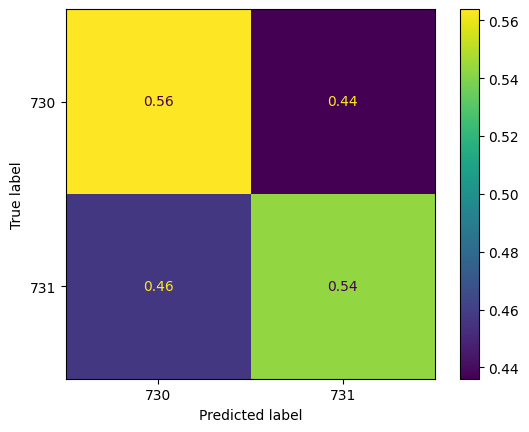

Accuracy: 0.6287236382297597
Accuracy 730: 0.7326001955034213
Accuracy 731: 0.5248521577635502
Integrated:  40921  percentual:  1.0 %


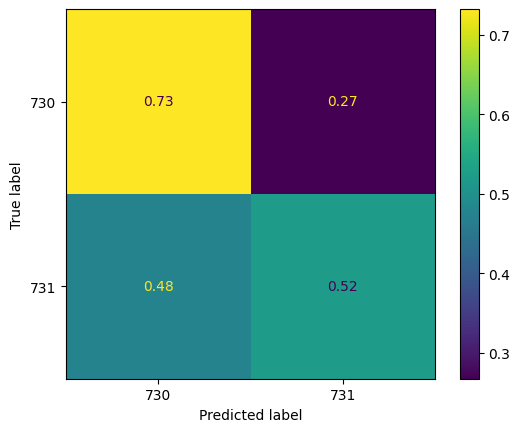

Accuracy: 0.5786656891495601
Accuracy 730: 0.6201368523949169
Accuracy 731: 0.5371945259042034
Integrated:  122760  percentual:  1.0 %


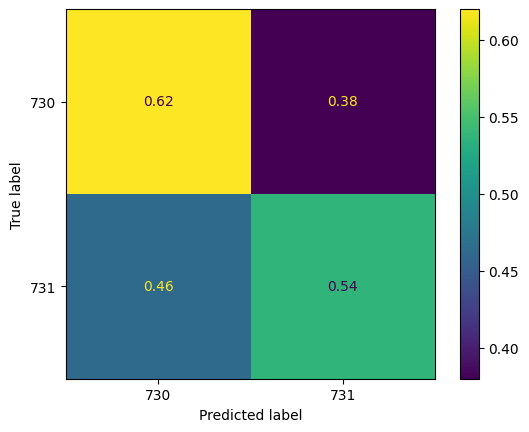

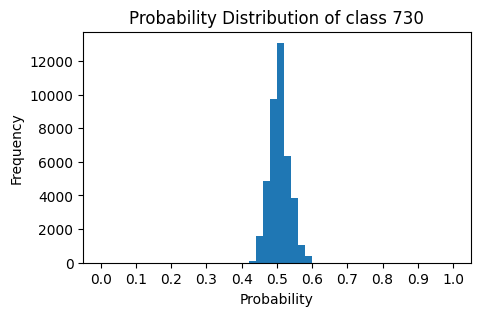

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier1.yaml
Train set: (81839, 2) (81839,)
Test set: (40921, 2) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.0}
Best score found:  0.5763440860215054
Accuracy train: 0.6020723615879959
Accuracy test:  0.5966374233278756
Accuracy all:   0.6002606712284132
Accuracy: 0.6020723615879959
Accuracy 730: 0.6635386119257087
Accuracy 731: 0.5406046091057943
Integrated:  81839  percentual:  1.0 %


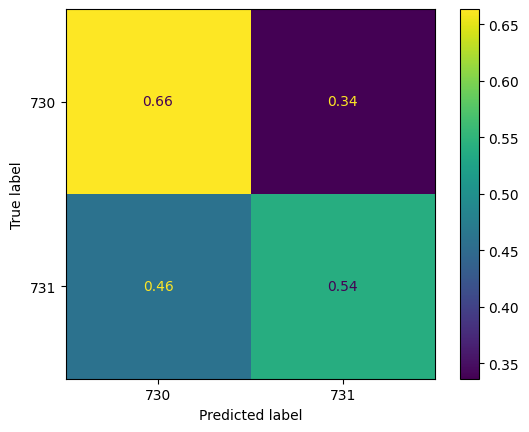

Accuracy: 0.5966374233278756
Accuracy 730: 0.6819159335288367
Accuracy 731: 0.5113630809833342
Integrated:  40921  percentual:  1.0 %


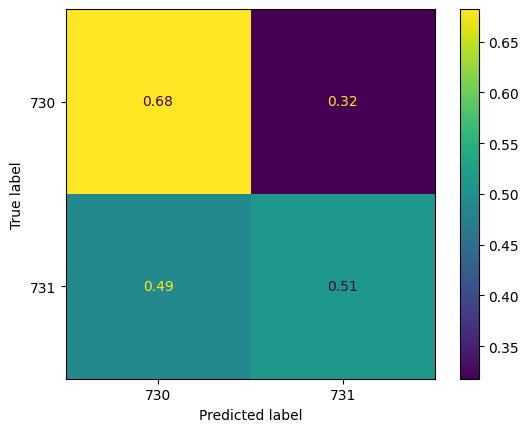

Accuracy: 0.6002606712284132
Accuracy 730: 0.669664385793418
Accuracy 731: 0.5308569566634083
Integrated:  122760  percentual:  1.0 %


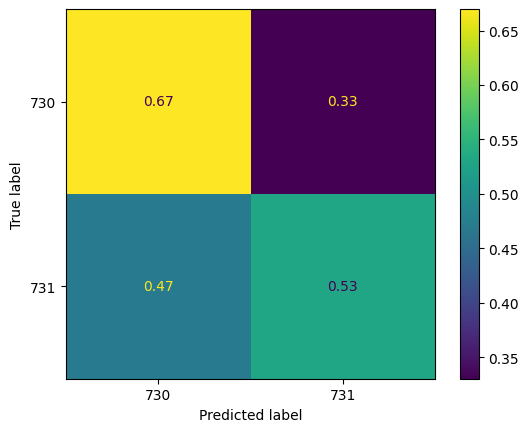

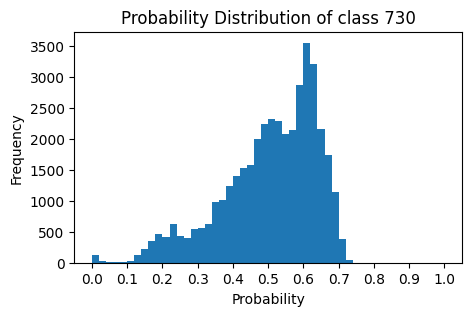

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier2.yaml
Train set: (81839, 3) (81839,)
Test set: (40921, 3) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.0}
Best score found:  0.5881068752036493
Accuracy train: 0.60856071066362
Accuracy test:  0.6092226485178759
Accuracy all:   0.6087813620071685
Accuracy: 0.60856071066362
Accuracy 730: 0.6724095796676441
Accuracy 731: 0.5447102812874215
Integrated:  81839  percentual:  1.0 %


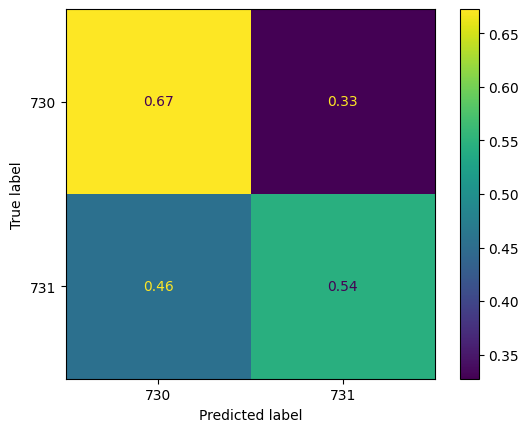

Accuracy: 0.6092226485178759
Accuracy 730: 0.6840175953079178
Accuracy 731: 0.5344313572161673
Integrated:  40921  percentual:  1.0 %


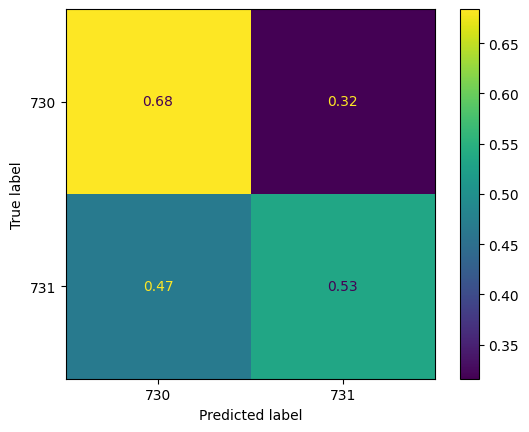

Accuracy: 0.6087813620071685
Accuracy 730: 0.6762789182144021
Accuracy 731: 0.5412838057999348
Integrated:  122760  percentual:  1.0 %


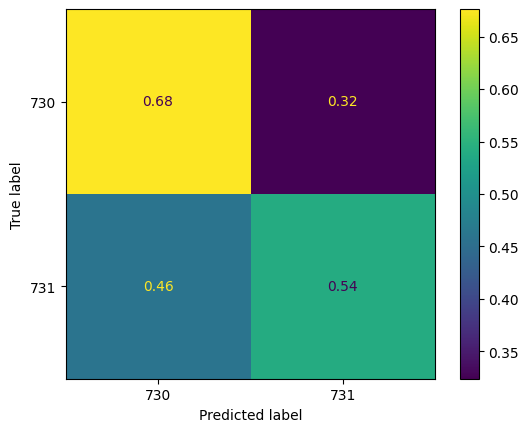

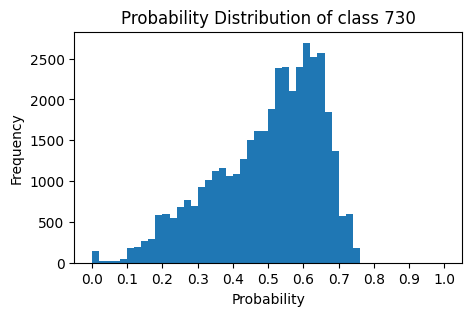

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier3.yaml
Train set: (81839, 4) (81839,)
Test set: (40921, 4) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.0}
Best score found:  0.5903796024763767
Accuracy train: 0.6494214249929741
Accuracy test:  0.5851030033479143
Accuracy all:   0.6279814271749755
Accuracy: 0.6494214249929741
Accuracy 730: 0.7564271749755621
Accuracy 731: 0.5424130599477015
Integrated:  81839  percentual:  1.0 %


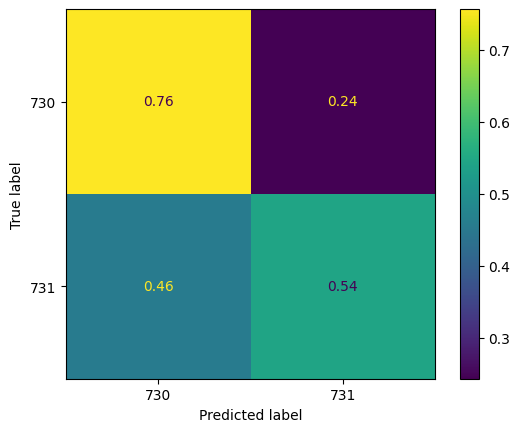

Accuracy: 0.5851030033479143
Accuracy 730: 0.7471652003910069
Accuracy 731: 0.4230487268461952
Integrated:  40921  percentual:  1.0 %


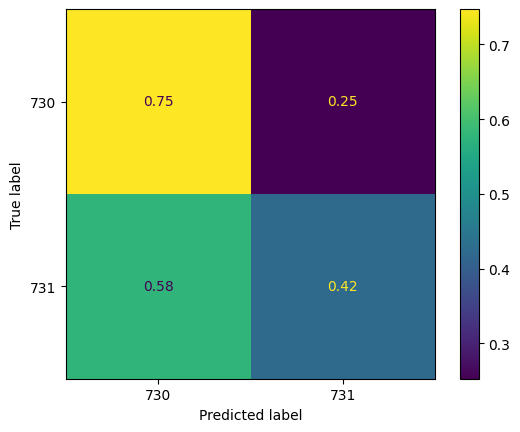

Accuracy: 0.6279814271749755
Accuracy 730: 0.7533398501140437
Accuracy 731: 0.5026230042359074
Integrated:  122760  percentual:  1.0 %


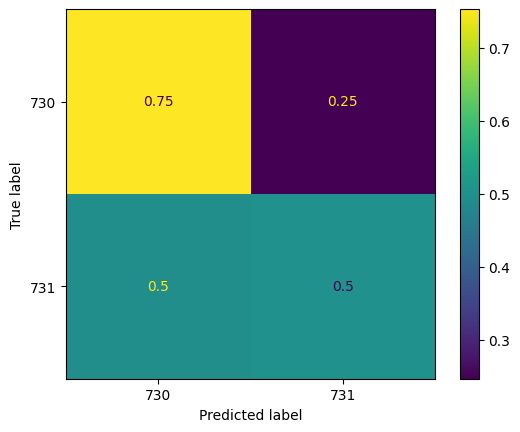

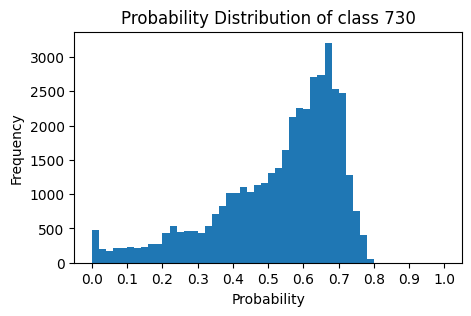

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier4.yaml
Train set: (81839, 5) (81839,)
Test set: (40921, 5) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.0}
Best score found:  0.5916014988595635
Accuracy train: 0.6576815454734295
Accuracy test:  0.5807042838640307
Accuracy all:   0.6320218312153796
Accuracy: 0.6576815454734295
Accuracy 730: 0.7753910068426197
Accuracy 731: 0.5399692074586377
Integrated:  81839  percentual:  1.0 %


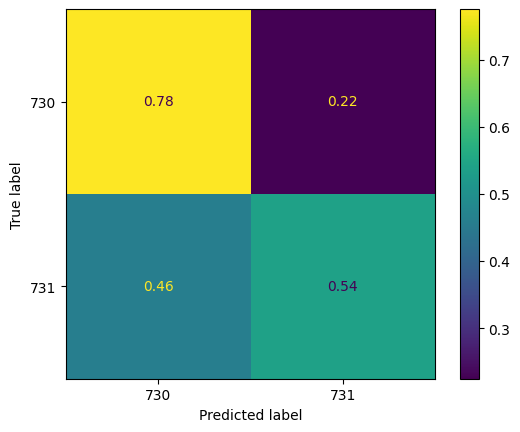

Accuracy: 0.5807042838640307
Accuracy 730: 0.7436950146627566
Accuracy 731: 0.4177215189873418
Integrated:  40921  percentual:  1.0 %


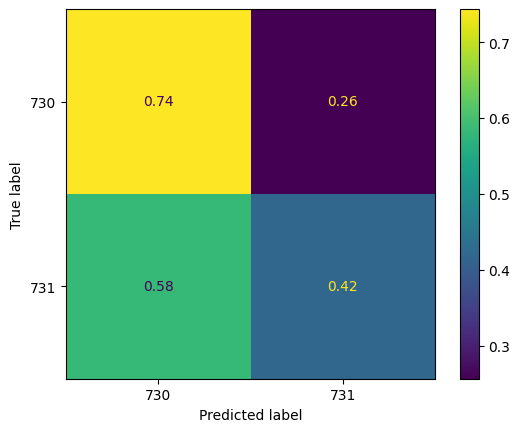

Accuracy: 0.6320218312153796
Accuracy 730: 0.7648256761159987
Accuracy 731: 0.4992179863147605
Integrated:  122760  percentual:  1.0 %


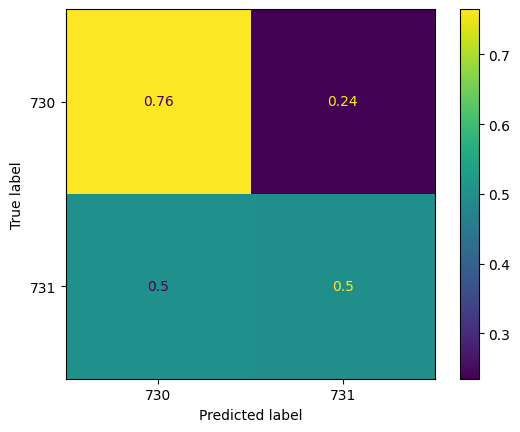

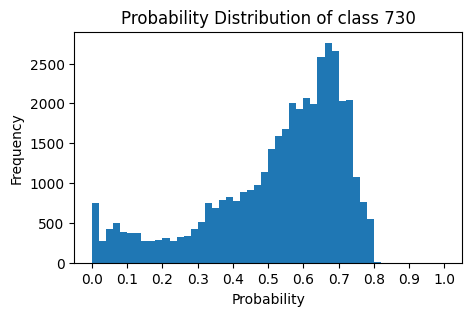

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier5.yaml
Train set: (81839, 6) (81839,)
Test set: (40921, 6) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.0}
Best score found:  0.5992750081459759
Accuracy train: 0.6678722858294945
Accuracy test:  0.5965152366755455
Accuracy all:   0.6440860215053763
Accuracy: 0.6678722858294945
Accuracy 730: 0.7808162267839687
Accuracy 731: 0.554925584691708
Integrated:  81839  percentual:  1.0 %


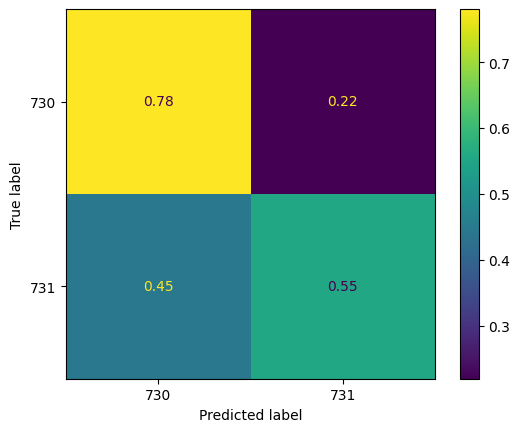

Accuracy: 0.5965152366755455
Accuracy 730: 0.7342619745845552
Accuracy 731: 0.4587752309271297
Integrated:  40921  percentual:  1.0 %


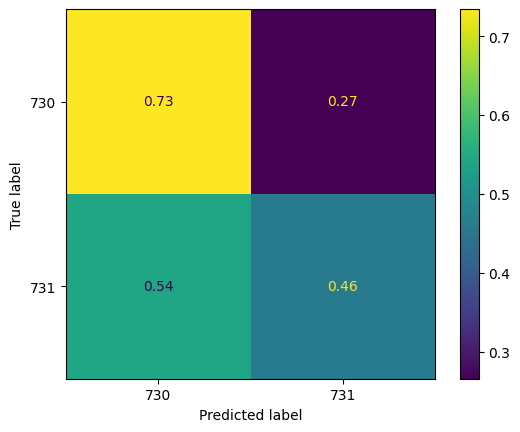

Accuracy: 0.6440860215053763
Accuracy 730: 0.7652981427174975
Accuracy 731: 0.5228739002932551
Integrated:  122760  percentual:  1.0 %


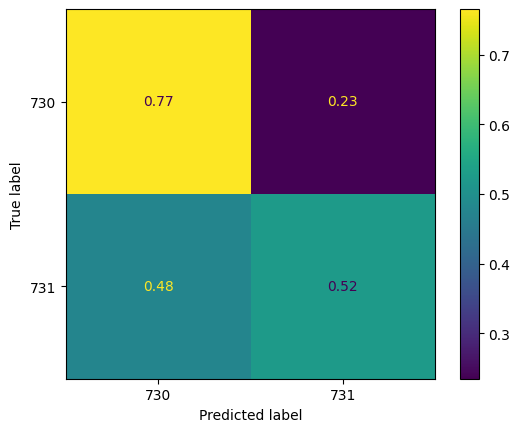

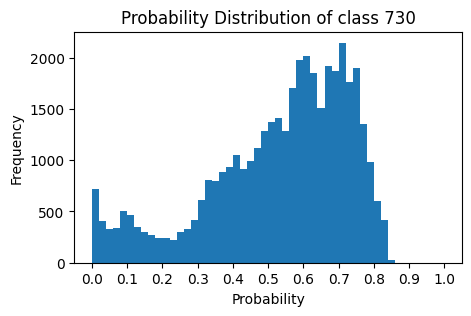

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier6.yaml
Train set: (81839, 7) (81839,)
Test set: (40921, 7) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.0}
Best score found:  0.593752036493972
Accuracy train: 0.6612861838487762
Accuracy test:  0.6190220180347499
Accuracy all:   0.6471977842945585
Accuracy: 0.6612861838487762
Accuracy 730: 0.7852150537634408
Accuracy 731: 0.5373542852953396
Integrated:  81839  percentual:  1.0 %


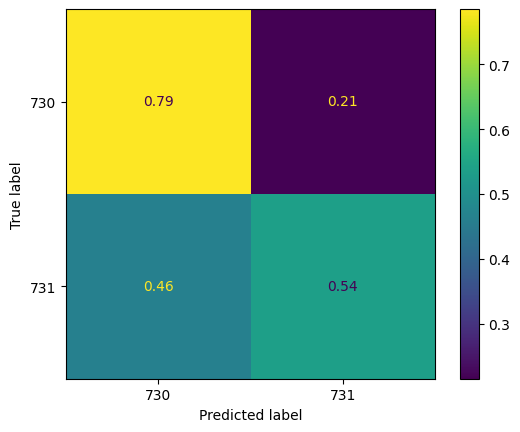

Accuracy: 0.6190220180347499
Accuracy 730: 0.7453079178885631
Accuracy 731: 0.49274229021064464
Integrated:  40921  percentual:  1.0 %


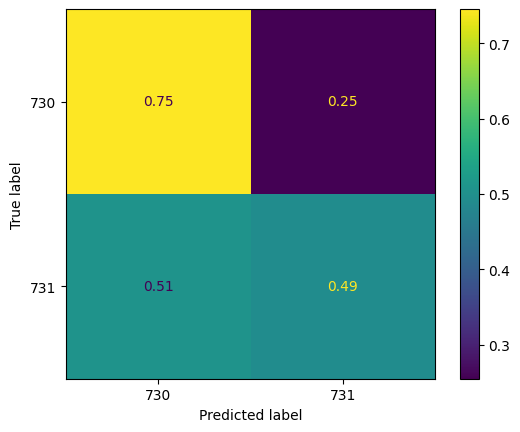

Accuracy: 0.6471977842945585
Accuracy 730: 0.7719126751384816
Accuracy 731: 0.5224828934506354
Integrated:  122760  percentual:  1.0 %


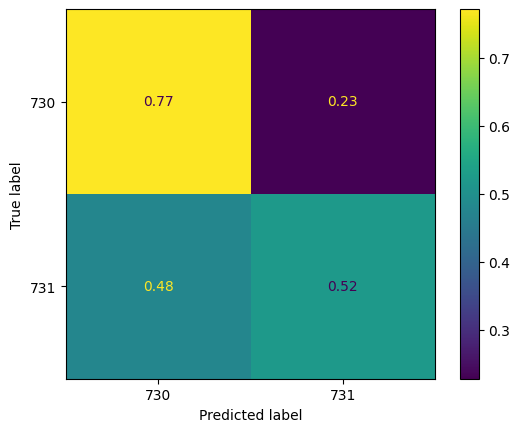

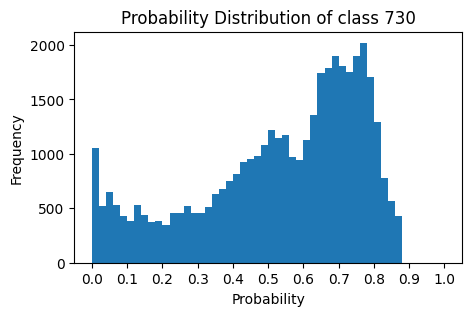

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier7.yaml
Train set: (81839, 8) (81839,)
Test set: (40921, 8) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.0}
Best score found:  0.5764581296839361
Accuracy train: 0.6578037366047972
Accuracy test:  0.5880843576647687
Accuracy all:   0.634563375692408
Accuracy: 0.6578037366047972
Accuracy 730: 0.7843841642228739
Accuracy 731: 0.5312202155477895
Integrated:  81839  percentual:  1.0 %


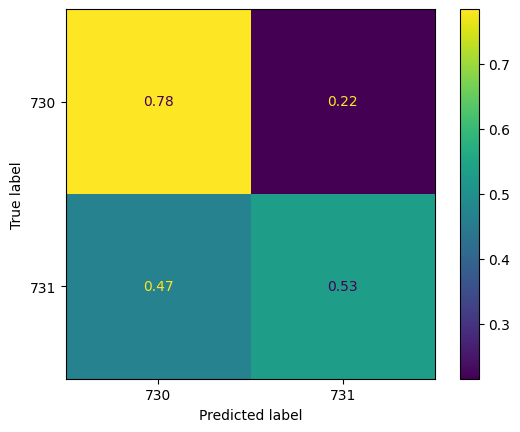

Accuracy: 0.5880843576647687
Accuracy 730: 0.7456011730205279
Accuracy 731: 0.43057524070182296
Integrated:  40921  percentual:  1.0 %


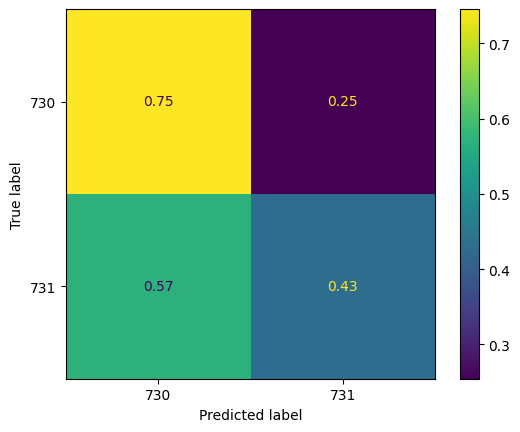

Accuracy: 0.634563375692408
Accuracy 730: 0.7714565004887586
Accuracy 731: 0.4976702508960573
Integrated:  122760  percentual:  1.0 %


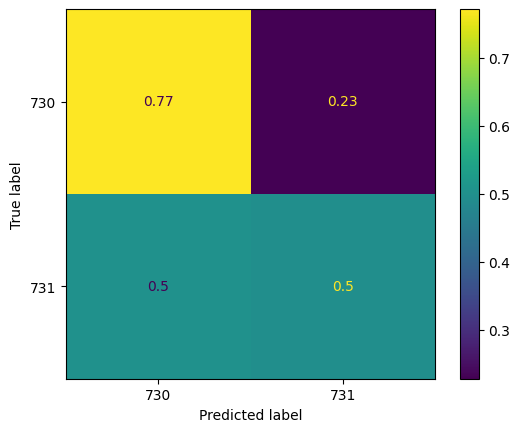

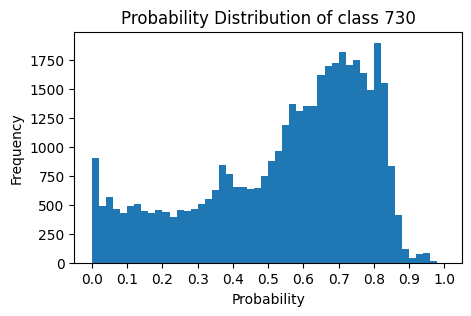

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier8.yaml
Train set: (81839, 9) (81839,)
Test set: (40921, 9) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.0}
Best score found:  0.5769876181166504
Accuracy train: 0.6770732780214812
Accuracy test:  0.5817795264045356
Accuracy all:   0.645307917888563
Accuracy: 0.6770732780214812
Accuracy 730: 0.7787390029325513
Accuracy 731: 0.5754050685500623
Integrated:  81839  percentual:  1.0 %


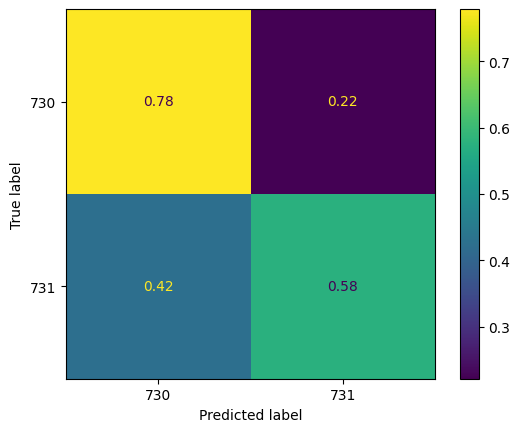

Accuracy: 0.5817795264045356
Accuracy 730: 0.7130987292277615
Accuracy 731: 0.4504667416059821
Integrated:  40921  percentual:  1.0 %


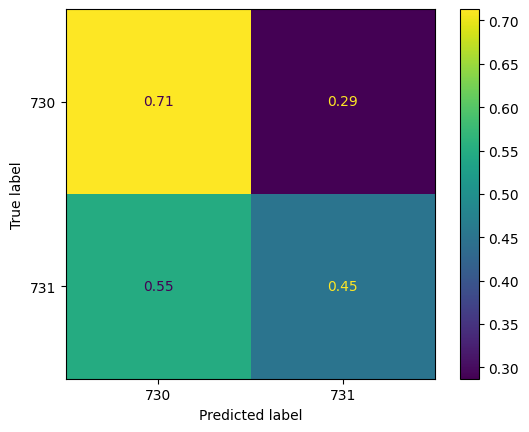

Accuracy: 0.645307917888563
Accuracy 730: 0.7568589116976214
Accuracy 731: 0.5337569240795047
Integrated:  122760  percentual:  1.0 %


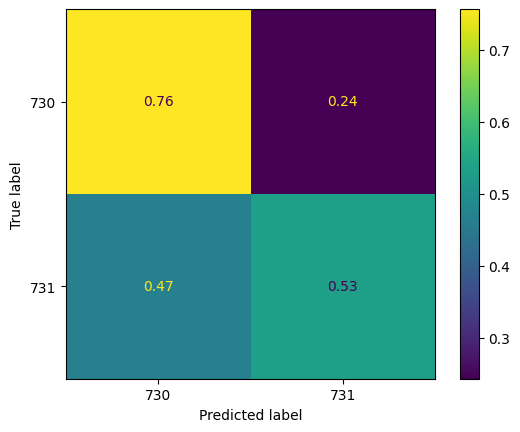

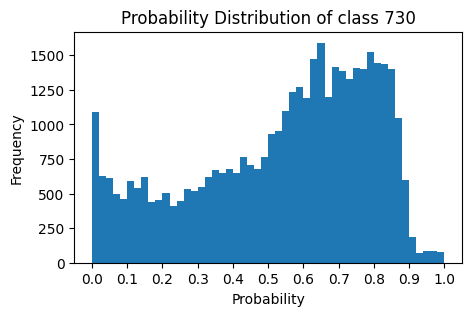

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier9.yaml
Train set: (81839, 10) (81839,)
Test set: (40921, 10) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.569028999674161
Accuracy train: 0.5508742775449358
Accuracy test:  0.6317294298770803
Accuracy all:   0.5778266536331053
Accuracy: 0.5508742775449358
Accuracy 730: 0.546871945259042
Accuracy 731: 0.5548767076419268
Integrated:  81839  percentual:  1.0 %


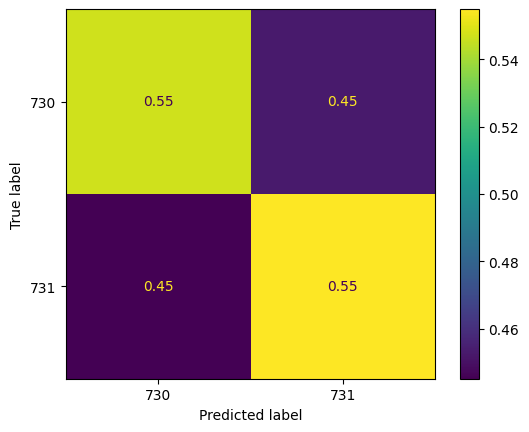

Accuracy: 0.6317294298770803
Accuracy 730: 0.738514173998045
Accuracy 731: 0.5249499046967402
Integrated:  40921  percentual:  1.0 %


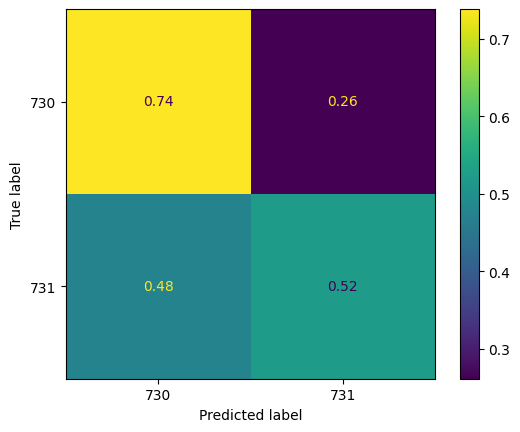

Accuracy: 0.5778266536331053
Accuracy 730: 0.610752688172043
Accuracy 731: 0.5449006190941674
Integrated:  122760  percentual:  1.0 %


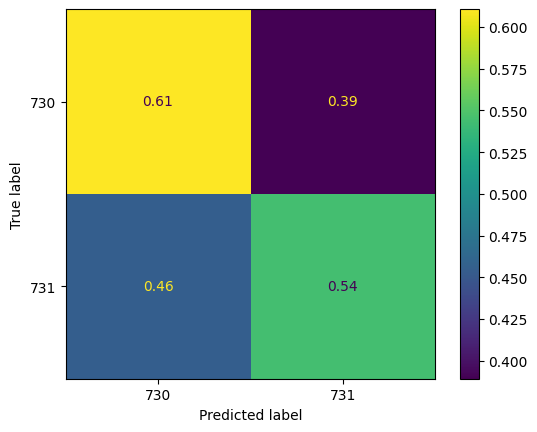

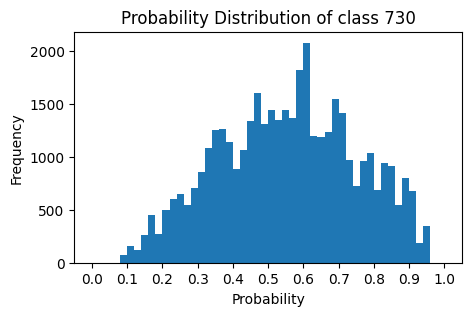

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier10.yaml
Train set: (81839, 11) (81839,)
Test set: (40921, 11) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.5692245030954709
Accuracy train: 0.5474407067535039
Accuracy test:  0.6281127049681093
Accuracy all:   0.5743320299771912
Accuracy: 0.5474407067535039
Accuracy 730: 0.5400293255131965
Accuracy 731: 0.5548522691170361
Integrated:  81839  percentual:  1.0 %


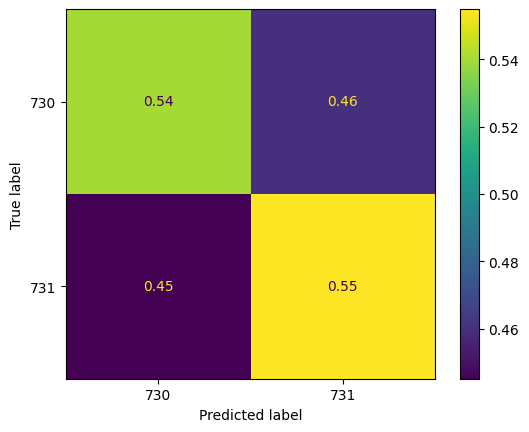

Accuracy: 0.6281127049681093
Accuracy 730: 0.7341642228739003
Accuracy 731: 0.522066370167636
Integrated:  40921  percentual:  1.0 %


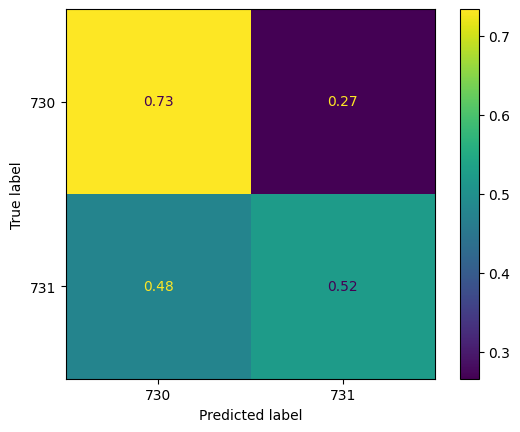

Accuracy: 0.5743320299771912
Accuracy 730: 0.6047409579667644
Accuracy 731: 0.5439231019876181
Integrated:  122760  percentual:  1.0 %


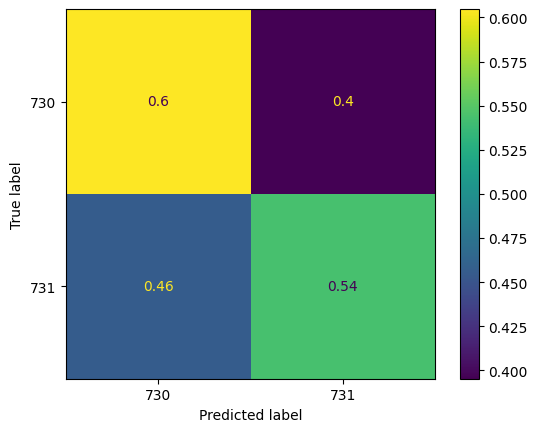

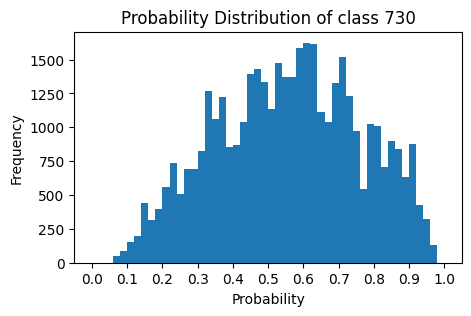

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier11.yaml
Train set: (81839, 12) (81839,)
Test set: (40921, 12) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.5689149560117301
Accuracy train: 0.5477095272425128
Accuracy test:  0.6268908384448083
Accuracy all:   0.5741039426523298
Accuracy: 0.5477095272425128
Accuracy 730: 0.5402981427174975
Accuracy 731: 0.5551210928908331
Integrated:  81839  percentual:  1.0 %


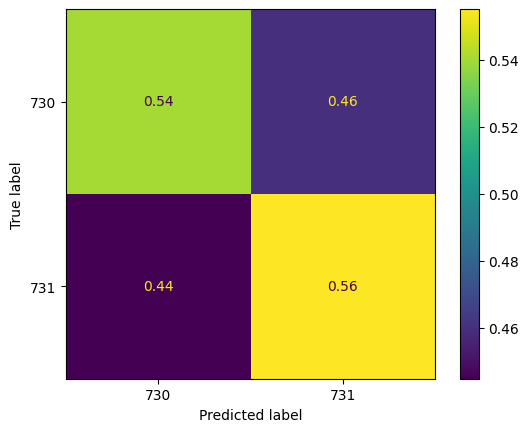

Accuracy: 0.6268908384448083
Accuracy 730: 0.7317693059628544
Accuracy 731: 0.522017496701041
Integrated:  40921  percentual:  1.0 %


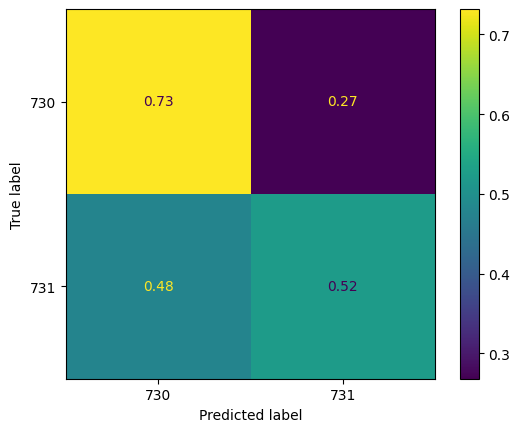

Accuracy: 0.5741039426523298
Accuracy 730: 0.6041218637992831
Accuracy 731: 0.5440860215053763
Integrated:  122760  percentual:  1.0 %


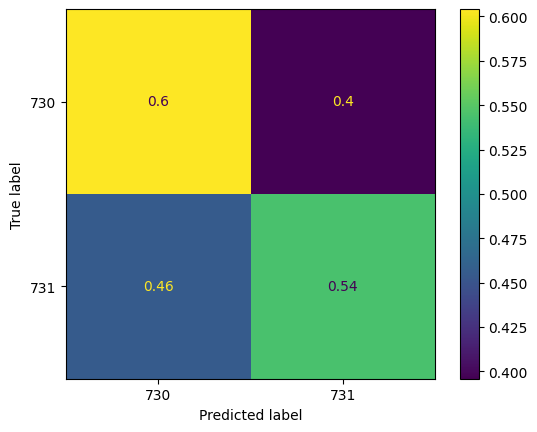

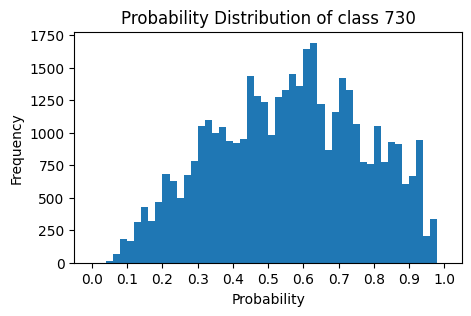

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier12.yaml
Train set: (81839, 13) (81839,)
Test set: (40921, 13) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.5695666340827631
Accuracy train: 0.5493957648553868
Accuracy test:  0.6251557879817209
Accuracy all:   0.5746497230368198
Accuracy: 0.5493957648553868
Accuracy 730: 0.5416666666666666
Accuracy 731: 0.5571250519318653
Integrated:  81839  percentual:  1.0 %


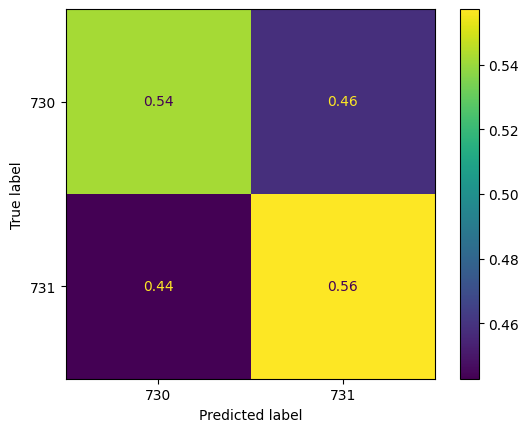

Accuracy: 0.6251557879817209
Accuracy 730: 0.729227761485826
Accuracy 731: 0.5210889008357362
Integrated:  40921  percentual:  1.0 %


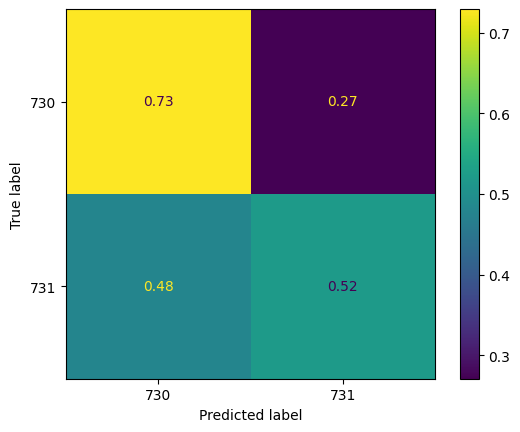

Accuracy: 0.5746497230368198
Accuracy 730: 0.6041870316063864
Accuracy 731: 0.5451124144672532
Integrated:  122760  percentual:  1.0 %


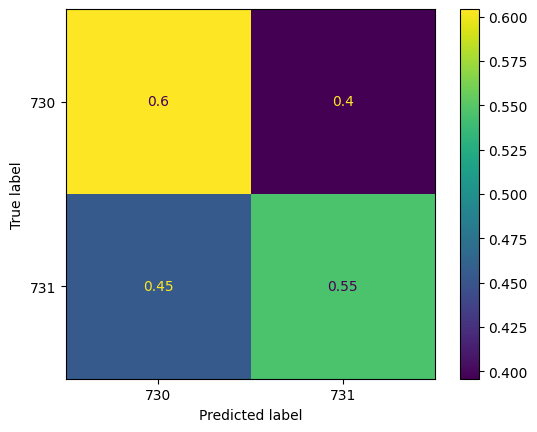

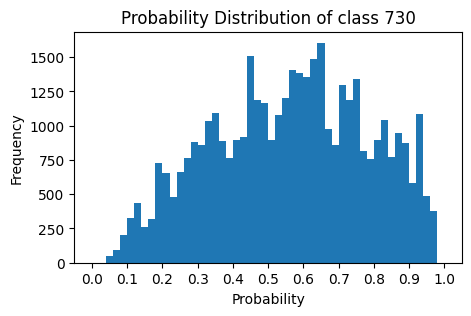

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier13.yaml
Train set: (81839, 14) (81839,)
Test set: (40921, 14) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.5692815249266863
Accuracy train: 0.5506665526216107
Accuracy test:  0.6248869773465947
Accuracy all:   0.5754072987943956
Accuracy: 0.5506665526216107
Accuracy 730: 0.5425708699902249
Accuracy 731: 0.5587624330995381
Integrated:  81839  percentual:  1.0 %


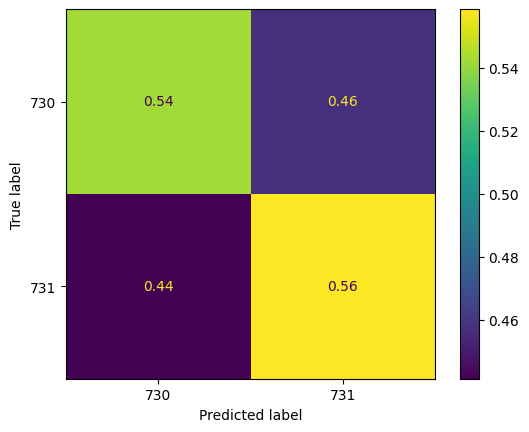

Accuracy: 0.6248869773465947
Accuracy 730: 0.7278592375366569
Accuracy 731: 0.521919749767851
Integrated:  40921  percentual:  1.0 %


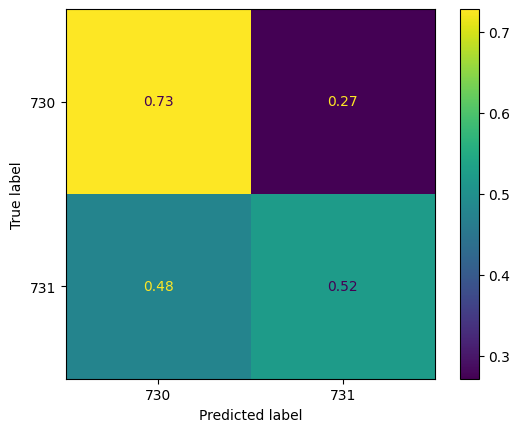

Accuracy: 0.5754072987943956
Accuracy 730: 0.6043336591723688
Accuracy 731: 0.5464809384164223
Integrated:  122760  percentual:  1.0 %


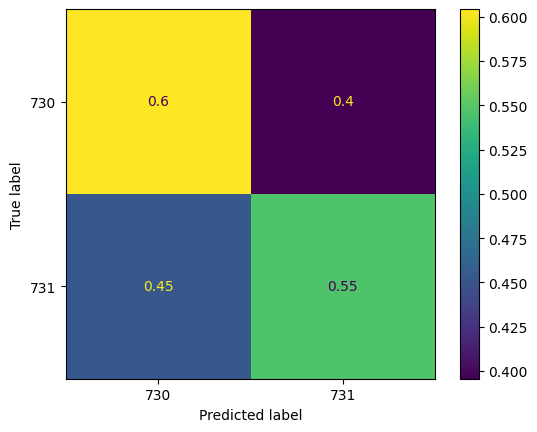

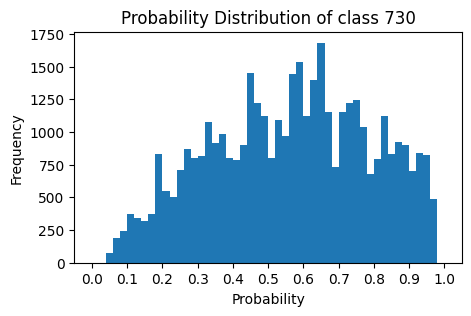

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier14.yaml
Train set: (81839, 15) (81839,)
Test set: (40921, 15) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.5690778755294884
Accuracy train: 0.5529881841175968
Accuracy test:  0.6239827961193519
Accuracy all:   0.576653633105246
Accuracy: 0.5529881841175968
Accuracy 730: 0.545503421309873
Accuracy 731: 0.5604731298418827
Integrated:  81839  percentual:  1.0 %


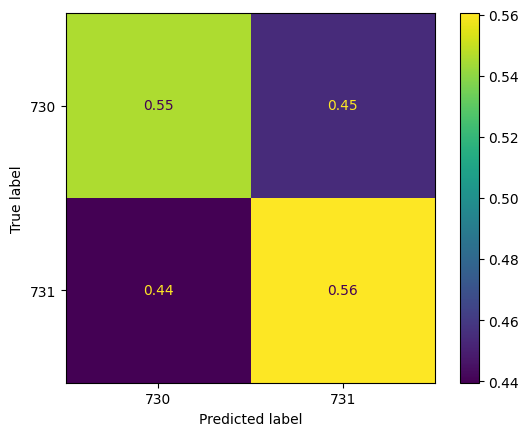

Accuracy: 0.6239827961193519
Accuracy 730: 0.7268817204301076
Accuracy 731: 0.5210889008357362
Integrated:  40921  percentual:  1.0 %


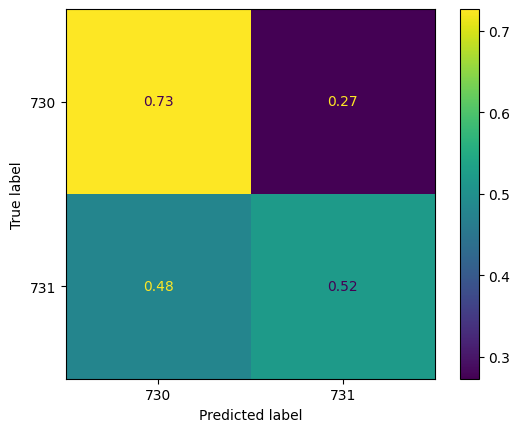

Accuracy: 0.576653633105246
Accuracy 730: 0.6059628543499511
Accuracy 731: 0.547344411860541
Integrated:  122760  percentual:  1.0 %


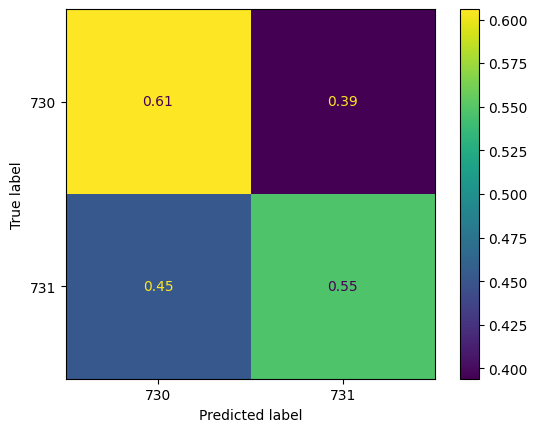

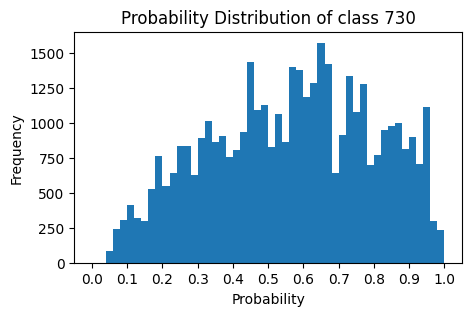

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier15.yaml
Train set: (81839, 16) (81839,)
Test set: (40921, 16) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.56747311827957
Accuracy train: 0.5496523662312589
Accuracy test:  0.623958358788886
Accuracy all:   0.5744216357119583
Accuracy: 0.5496523662312589
Accuracy 730: 0.5400782013685239
Accuracy 731: 0.5592267650724603
Integrated:  81839  percentual:  1.0 %


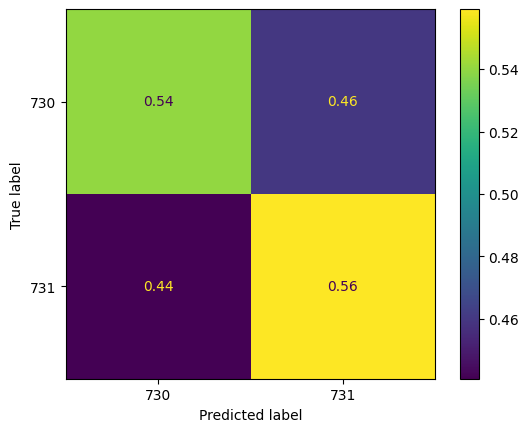

Accuracy: 0.623958358788886
Accuracy 730: 0.7248289345063539
Accuracy 731: 0.5230927129661307
Integrated:  40921  percentual:  1.0 %


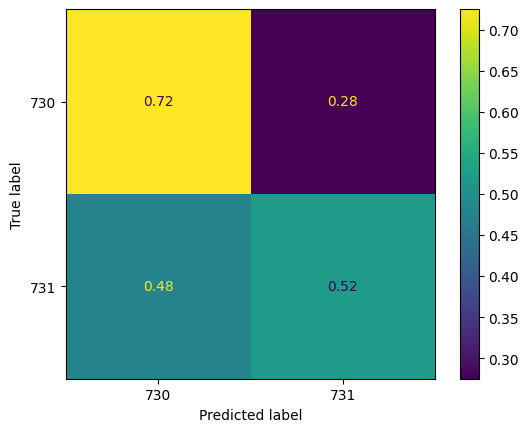

Accuracy: 0.5744216357119583
Accuracy 730: 0.6016617790811339
Accuracy 731: 0.5471814923427827
Integrated:  122760  percentual:  1.0 %


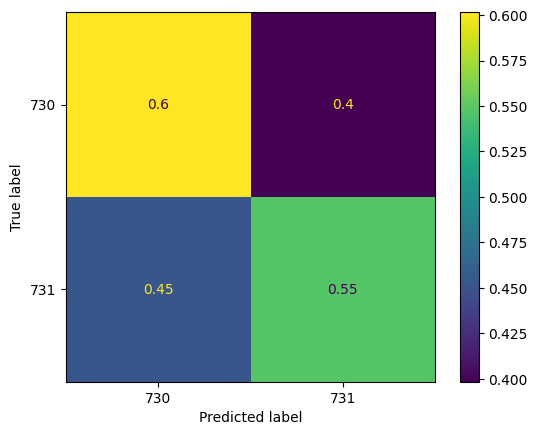

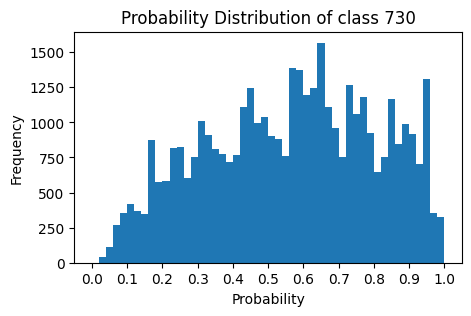

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier16.yaml
Train set: (81839, 17) (81839,)
Test set: (40921, 17) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.5686705767350928
Accuracy train: 0.5895599897359449
Accuracy test:  0.5981525378167689
Accuracy all:   0.5924242424242424
Accuracy: 0.5895599897359449
Accuracy 730: 0.751930596285435
Accuracy 731: 0.4271854150883453
Integrated:  81839  percentual:  1.0 %


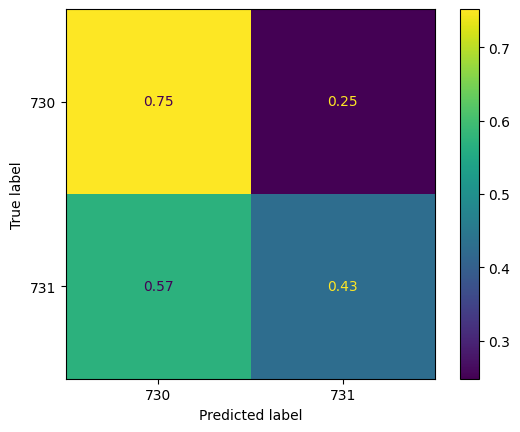

Accuracy: 0.5981525378167689
Accuracy 730: 0.8173509286412513
Accuracy 731: 0.3789648599775182
Integrated:  40921  percentual:  1.0 %


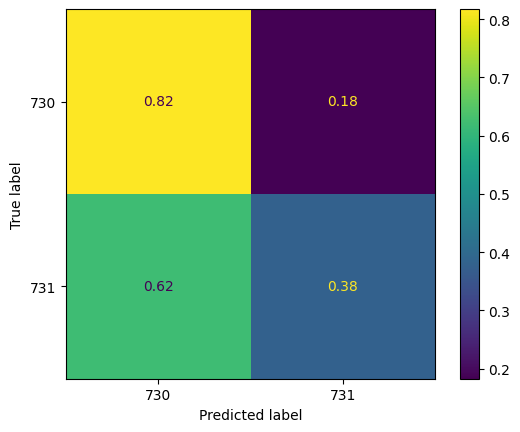

Accuracy: 0.5924242424242424
Accuracy 730: 0.7737373737373737
Accuracy 731: 0.4111111111111111
Integrated:  122760  percentual:  1.0 %


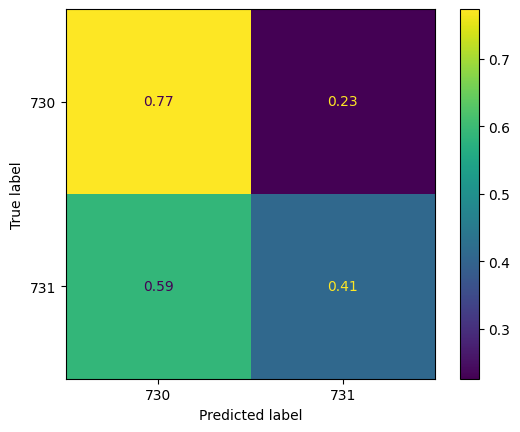

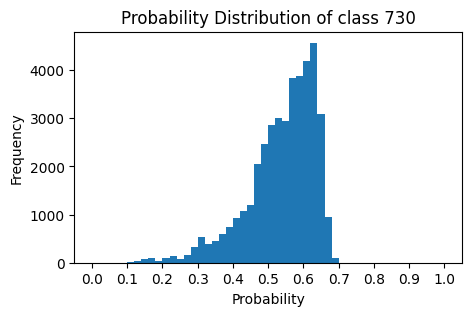

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier17.yaml
Train set: (81839, 18) (81839,)
Test set: (40921, 18) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.5673753665689149
Accuracy train: 0.5878370947836606
Accuracy test:  0.6025512573006525
Accuracy all:   0.592741935483871
Accuracy: 0.5878370947836606
Accuracy 730: 0.7492179863147606
Accuracy 731: 0.4264522593416261
Integrated:  81839  percentual:  1.0 %


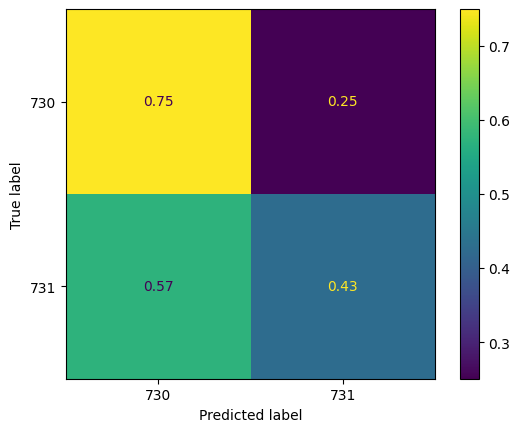

Accuracy: 0.6025512573006525
Accuracy 730: 0.8178885630498534
Accuracy 731: 0.38722447583207076
Integrated:  40921  percentual:  1.0 %


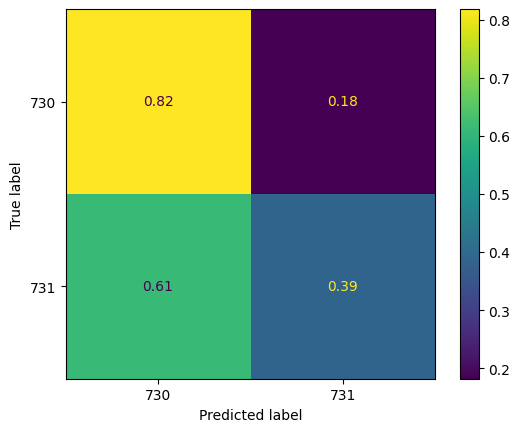

Accuracy: 0.592741935483871
Accuracy 730: 0.7721081785597914
Accuracy 731: 0.41337569240795047
Integrated:  122760  percentual:  1.0 %


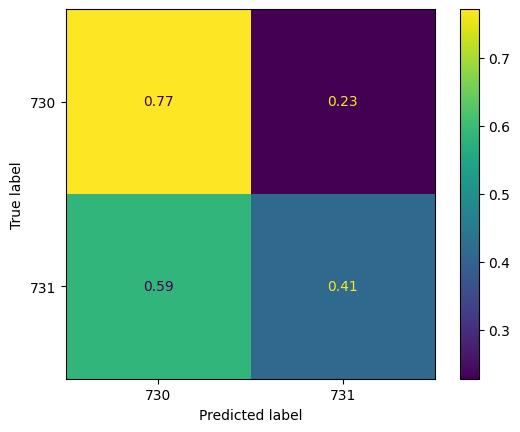

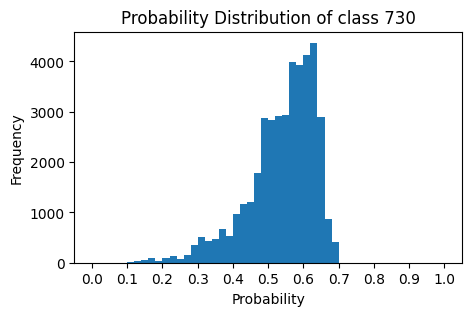

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier18.yaml
Train set: (81839, 19) (81839,)
Test set: (40921, 19) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.566813294232649
Accuracy train: 0.5891323207761581
Accuracy test:  0.6015982014124777
Accuracy all:   0.593287715868361
Accuracy: 0.5891323207761581
Accuracy 730: 0.7502199413489736
Accuracy 731: 0.4280407634595176
Integrated:  81839  percentual:  1.0 %


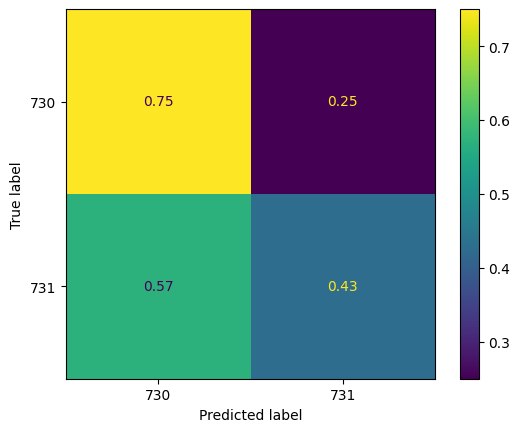

Accuracy: 0.6015982014124777
Accuracy 730: 0.8142717497556208
Accuracy 731: 0.3889350471628953
Integrated:  40921  percentual:  1.0 %


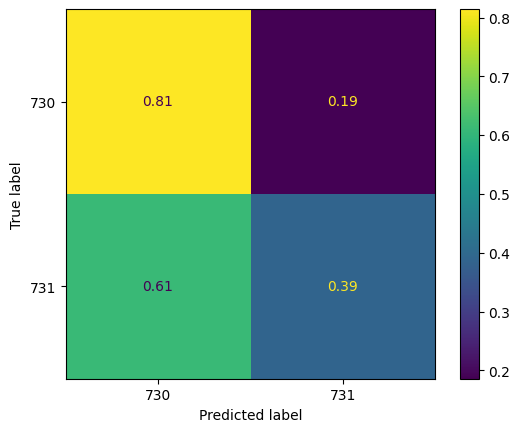

Accuracy: 0.593287715868361
Accuracy 730: 0.7715705441511893
Accuracy 731: 0.4150048875855327
Integrated:  122760  percentual:  1.0 %


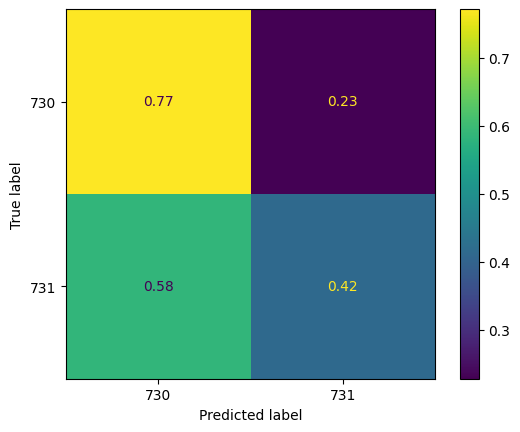

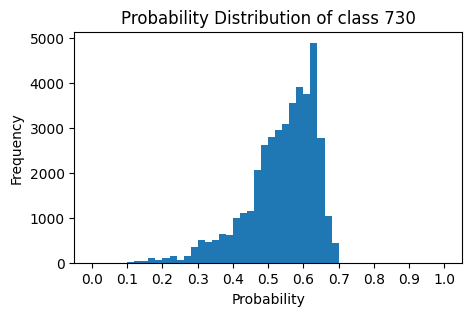

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier19.yaml
Train set: (81839, 20) (81839,)
Test set: (40921, 20) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.5714646464646463
Accuracy train: 0.6036119698432287
Accuracy test:  0.5996432149751961
Accuracy all:   0.6022890192245031
Accuracy: 0.6036119698432287
Accuracy 730: 0.7651759530791788
Accuracy 731: 0.44204403822185295
Integrated:  81839  percentual:  1.0 %


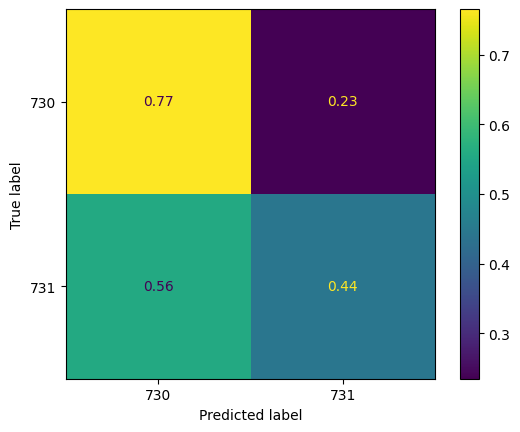

Accuracy: 0.5996432149751961
Accuracy 730: 0.8185239491691104
Accuracy 731: 0.3807731782415327
Integrated:  40921  percentual:  1.0 %


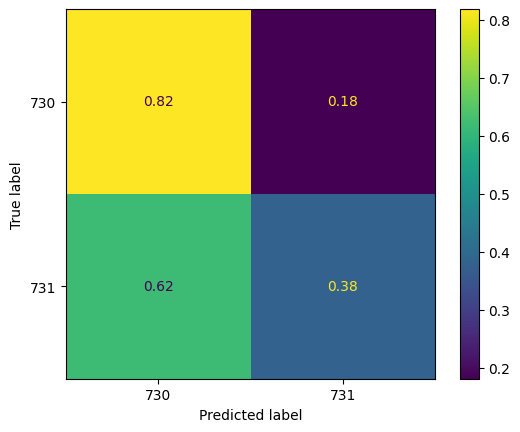

Accuracy: 0.6022890192245031
Accuracy 730: 0.7829586184424894
Accuracy 731: 0.42161942000651675
Integrated:  122760  percentual:  1.0 %


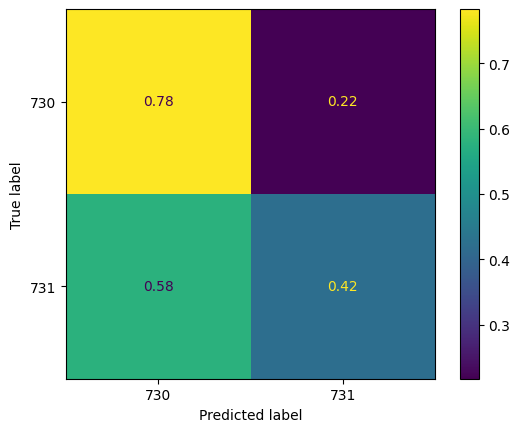

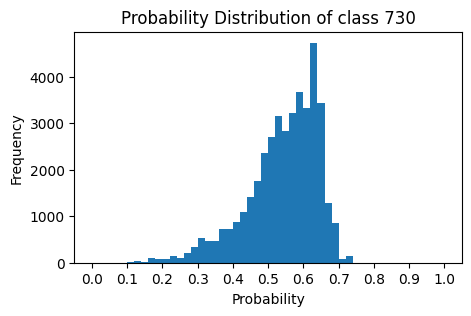

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier20.yaml
Train set: (81839, 21) (81839,)
Test set: (40921, 21) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.5707640925382861
Accuracy train: 0.6051515780984617
Accuracy test:  0.5985190977737592
Accuracy all:   0.602940697295536
Accuracy: 0.6051515780984617
Accuracy 730: 0.7668132942326491
Accuracy 731: 0.44348591119040054
Integrated:  81839  percentual:  1.0 %


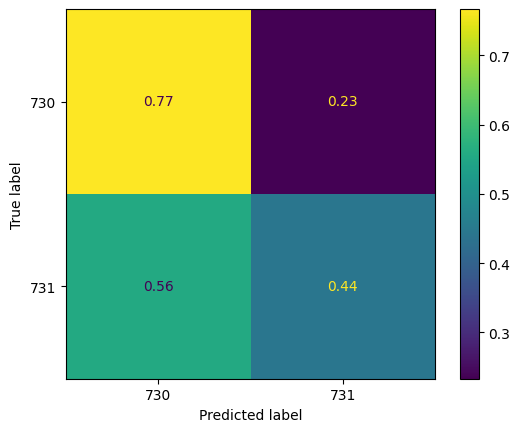

Accuracy: 0.5985190977737592
Accuracy 730: 0.809188660801564
Accuracy 731: 0.38785983089780557
Integrated:  40921  percentual:  1.0 %


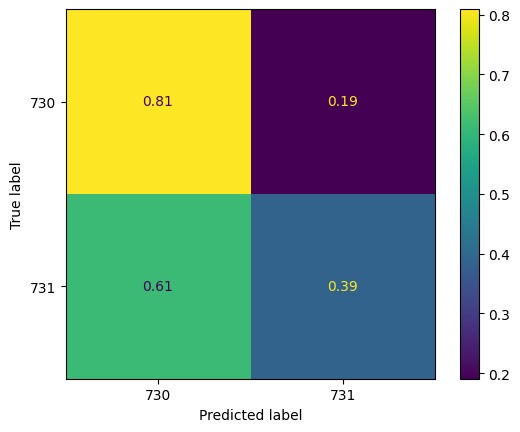

Accuracy: 0.602940697295536
Accuracy 730: 0.7809384164222873
Accuracy 731: 0.4249429781687846
Integrated:  122760  percentual:  1.0 %


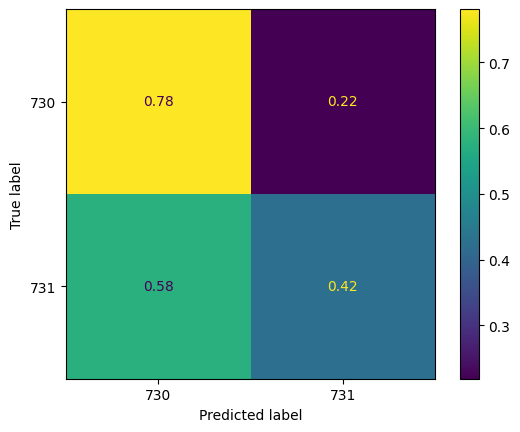

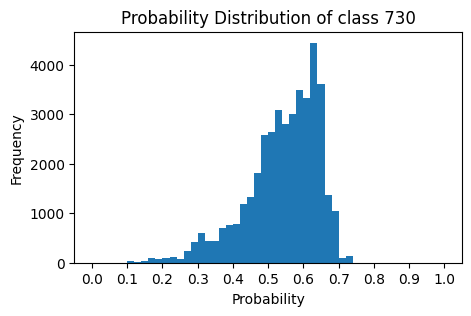

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier21.yaml
Train set: (81839, 22) (81839,)
Test set: (40921, 22) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.5732649071358749
Accuracy train: 0.609037256075954
Accuracy test:  0.6015493267515457
Accuracy all:   0.6065412186379928
Accuracy: 0.609037256075954
Accuracy 730: 0.7766129032258065
Accuracy 731: 0.4414575136244776
Integrated:  81839  percentual:  1.0 %


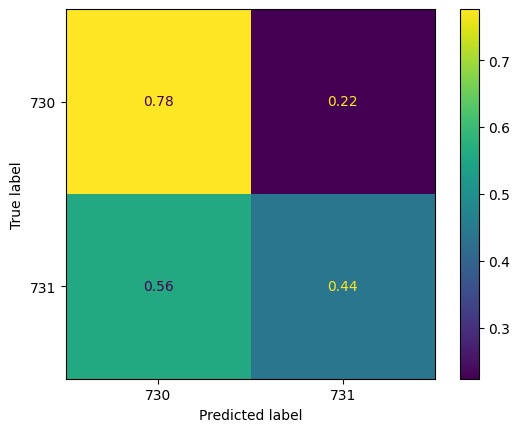

Accuracy: 0.6015493267515457
Accuracy 730: 0.8140273704789834
Accuracy 731: 0.3890816675626802
Integrated:  40921  percentual:  1.0 %


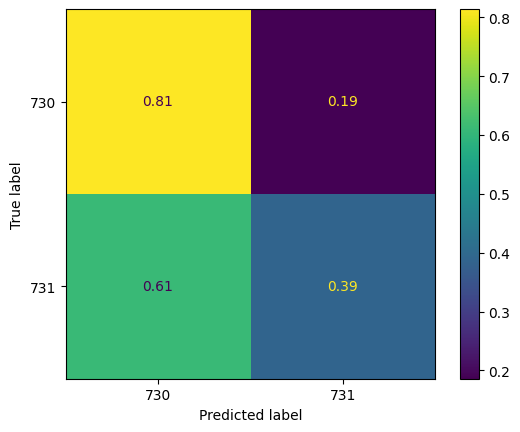

Accuracy: 0.6065412186379928
Accuracy 730: 0.7890843923101988
Accuracy 731: 0.4239980449657869
Integrated:  122760  percentual:  1.0 %


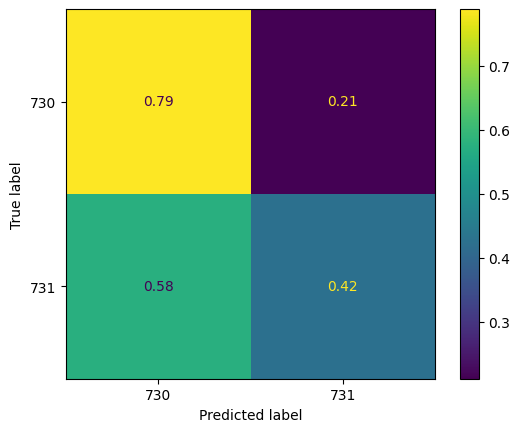

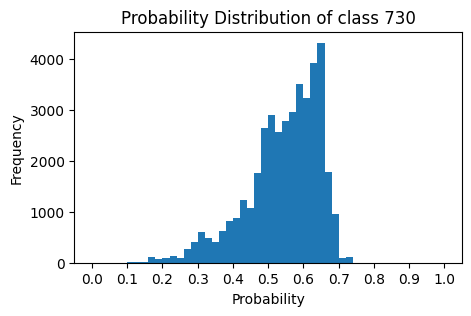

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier22.yaml
Train set: (81839, 23) (81839,)
Test set: (40921, 23) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.5701531443466928
Accuracy train: 0.609672649959066
Accuracy test:  0.6045306810684001
Accuracy all:   0.6079586184424894
Accuracy: 0.609672649959066
Accuracy 730: 0.7717497556207233
Accuracy 731: 0.44759158337202765
Integrated:  81839  percentual:  1.0 %


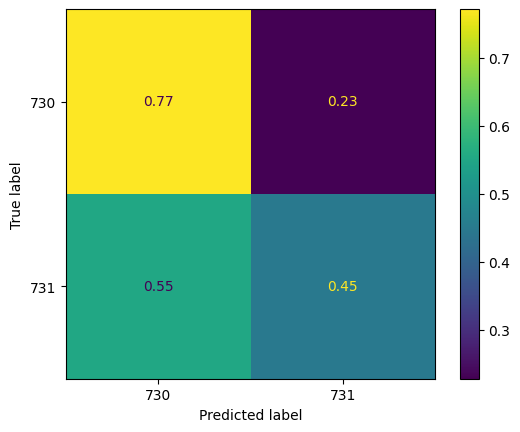

Accuracy: 0.6045306810684001
Accuracy 730: 0.8129032258064516
Accuracy 731: 0.39616832021895315
Integrated:  40921  percentual:  1.0 %


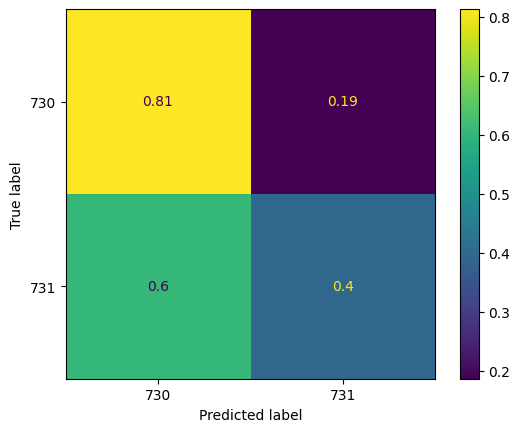

Accuracy: 0.6079586184424894
Accuracy 730: 0.7854675790159661
Accuracy 731: 0.4304496578690127
Integrated:  122760  percentual:  1.0 %


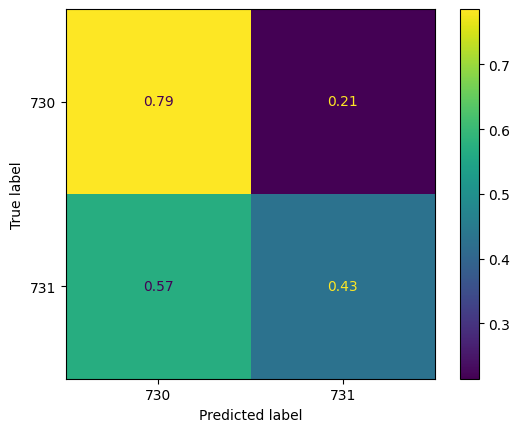

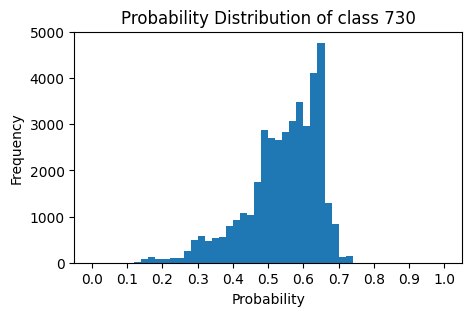

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier23.yaml
Train set: (81839, 24) (81839,)
Test set: (40921, 24) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.5686787227109807
Accuracy train: 0.6112733537799826
Accuracy test:  0.609271523178808
Accuracy all:   0.6106060606060606
Accuracy: 0.6112733537799826
Accuracy 730: 0.7753176930596285
Accuracy 731: 0.4472250054986681
Integrated:  81839  percentual:  1.0 %


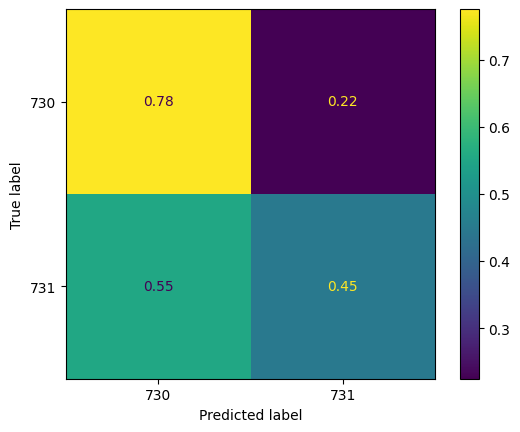

Accuracy: 0.609271523178808
Accuracy 730: 0.819208211143695
Accuracy 731: 0.3993450955476272
Integrated:  40921  percentual:  1.0 %


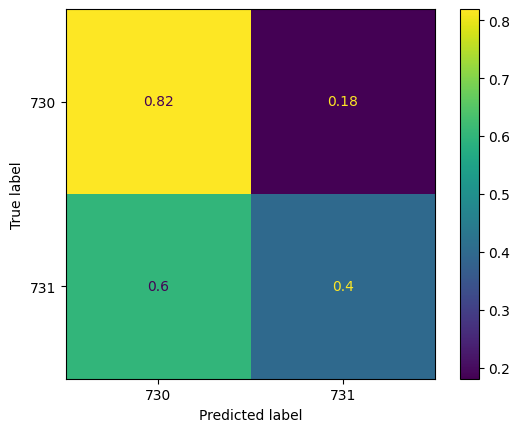

Accuracy: 0.6106060606060606
Accuracy 730: 0.7899478657543174
Accuracy 731: 0.43126425545780384
Integrated:  122760  percentual:  1.0 %


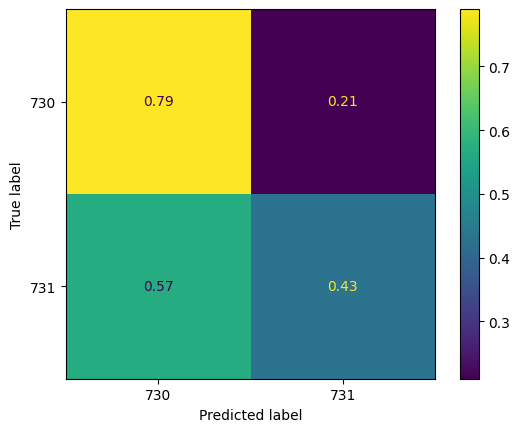

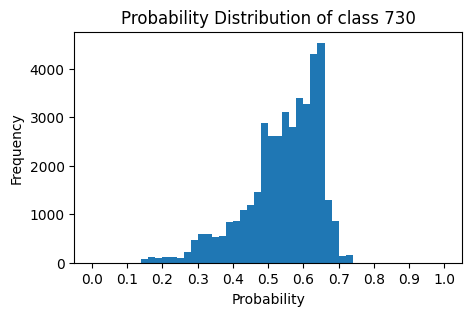

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier24.yaml
Train set: (81839, 25) (81839,)
Test set: (40921, 25) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.5664793092212447
Accuracy train: 0.5534036339642469
Accuracy test:  0.6254734732777791
Accuracy all:   0.5774275008145976
Accuracy: 0.5534036339642469
Accuracy 730: 0.5414222873900293
Accuracy 731: 0.5653852733449009
Integrated:  81839  percentual:  1.0 %


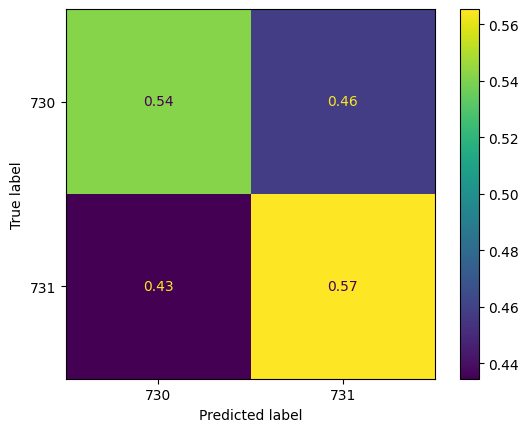

Accuracy: 0.6254734732777791
Accuracy 730: 0.7218963831867058
Accuracy 731: 0.5290552758907189
Integrated:  40921  percentual:  1.0 %


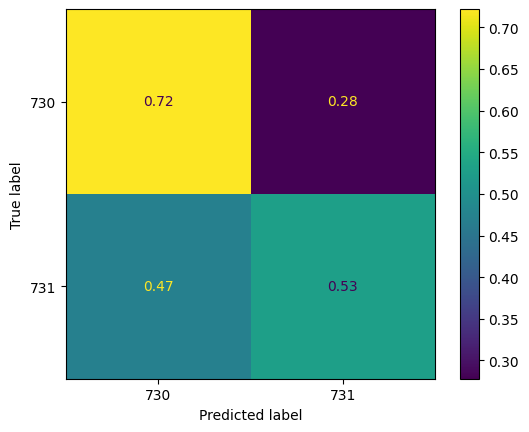

Accuracy: 0.5774275008145976
Accuracy 730: 0.6015803193222548
Accuracy 731: 0.5532746823069403
Integrated:  122760  percentual:  1.0 %


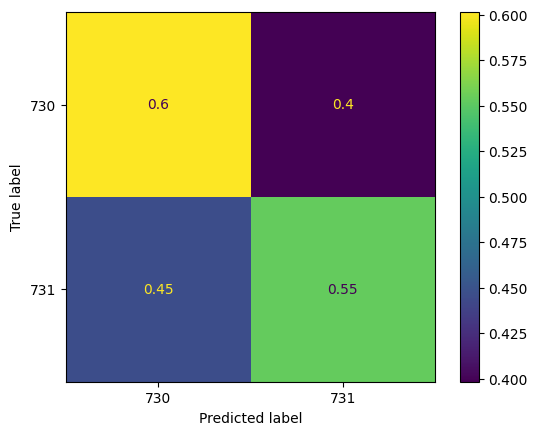

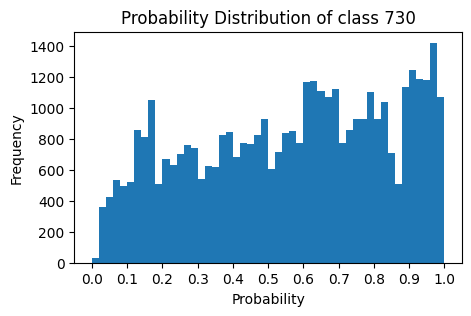

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier25.yaml
Train set: (81839, 26) (81839,)
Test set: (40921, 26) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.5668703160638644
Accuracy train: 0.5534769486430675
Accuracy test:  0.6246181667114684
Accuracy all:   0.5771912675138482
Accuracy: 0.5534769486430675
Accuracy 730: 0.5414467253176931
Accuracy 731: 0.5655074659693541
Integrated:  81839  percentual:  1.0 %


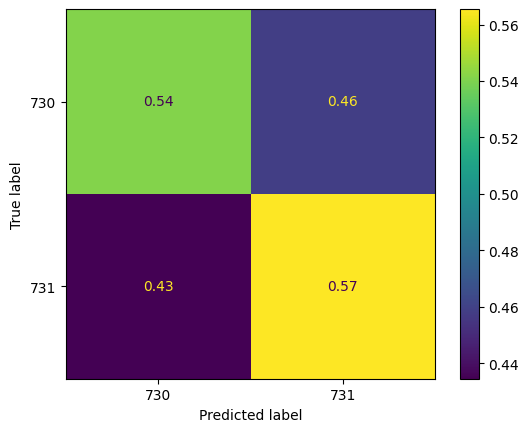

Accuracy: 0.6246181667114684
Accuracy 730: 0.7227272727272728
Accuracy 731: 0.5265138556277796
Integrated:  40921  percentual:  1.0 %


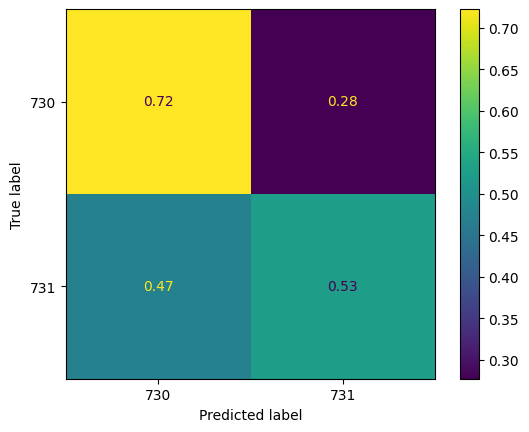

Accuracy: 0.5771912675138482
Accuracy 730: 0.6018735744542196
Accuracy 731: 0.5525089605734766
Integrated:  122760  percentual:  1.0 %


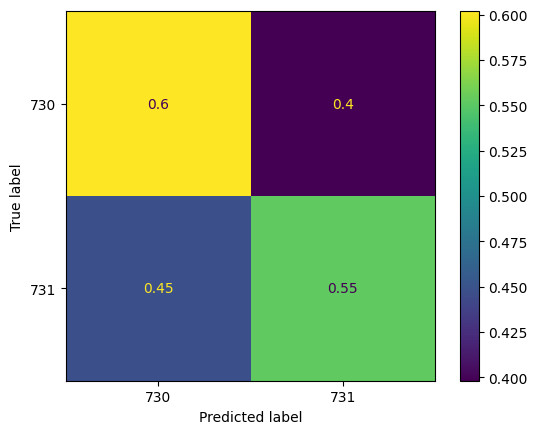

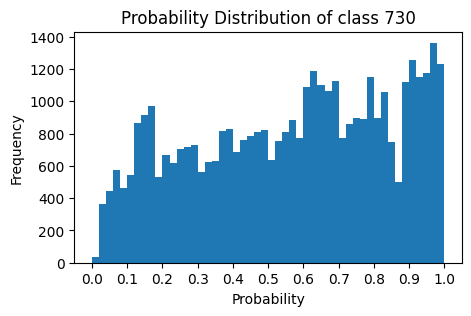

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier26.yaml
Train set: (81839, 27) (81839,)
Test set: (40921, 27) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.567367220593027
Accuracy train: 0.5551998435953518
Accuracy test:  0.6242027320935462
Accuracy all:   0.5782013685239492
Accuracy: 0.5551998435953518
Accuracy 730: 0.5428641251221896
Accuracy 731: 0.567535863535277
Integrated:  81839  percentual:  1.0 %


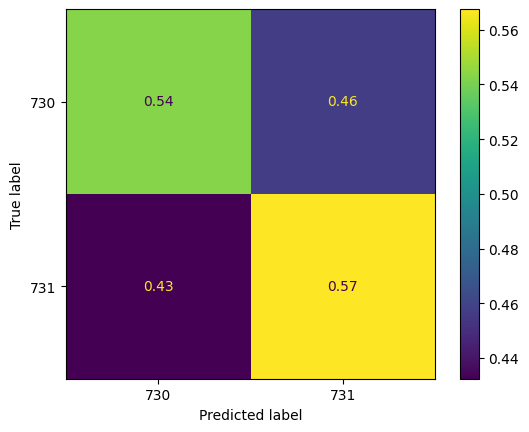

Accuracy: 0.6242027320935462
Accuracy 730: 0.7232160312805475
Accuracy 731: 0.525194272029715
Integrated:  40921  percentual:  1.0 %


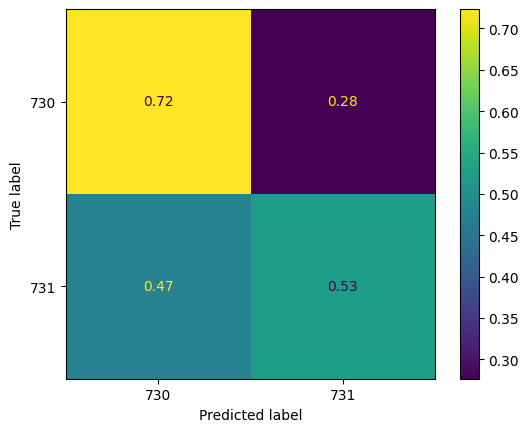

Accuracy: 0.5782013685239492
Accuracy 730: 0.6029814271749756
Accuracy 731: 0.5534213098729228
Integrated:  122760  percentual:  1.0 %


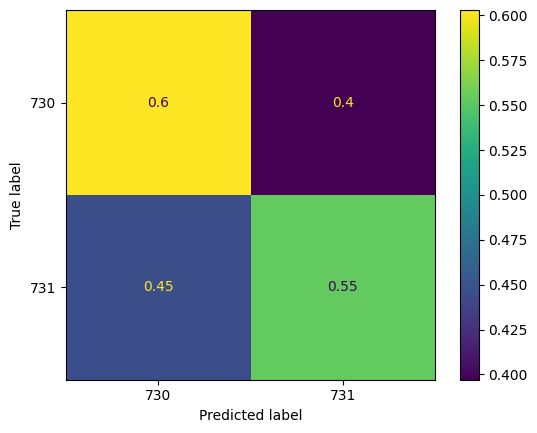

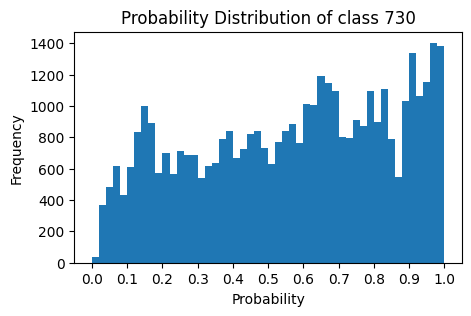

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier27.yaml
Train set: (81839, 28) (81839,)
Test set: (40921, 28) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.5648745519713263
Accuracy train: 0.5504832659245592
Accuracy test:  0.6253268492949831
Accuracy all:   0.5754317367220593
Accuracy: 0.5504832659245592
Accuracy 730: 0.5364125122189638
Accuracy 731: 0.5645543634986192
Integrated:  81839  percentual:  1.0 %


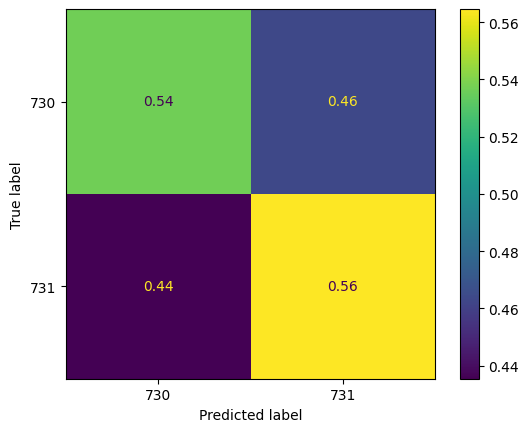

Accuracy: 0.6253268492949831
Accuracy 730: 0.7212609970674487
Accuracy 731: 0.5293973901568838
Integrated:  40921  percentual:  1.0 %


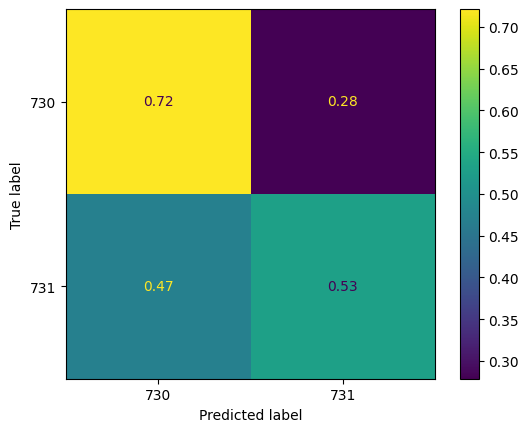

Accuracy: 0.5754317367220593
Accuracy 730: 0.5980286738351255
Accuracy 731: 0.5528347996089932
Integrated:  122760  percentual:  1.0 %


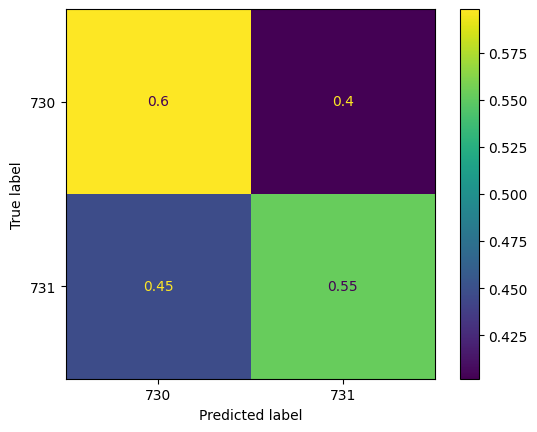

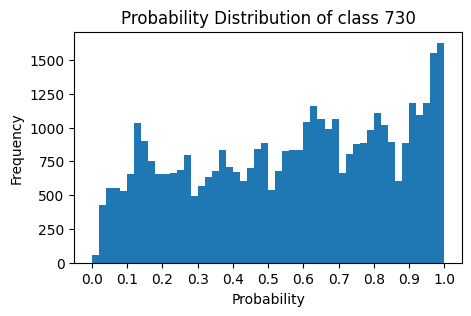

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier28.yaml
Train set: (81839, 29) (81839,)
Test set: (40921, 29) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.6257657217334637
Accuracy train: 0.6880216033920258
Accuracy test:  0.6518169155201485
Accuracy all:   0.6759530791788856
Accuracy: 0.6880216033920258
Accuracy 730: 0.7675219941348974
Accuracy 731: 0.6085192697768763
Integrated:  81839  percentual:  1.0 %


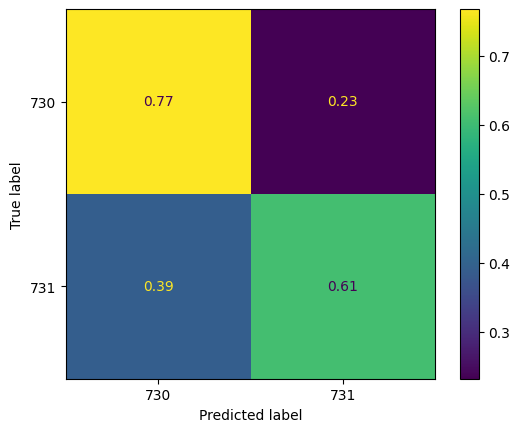

Accuracy: 0.6518169155201485
Accuracy 730: 0.7597751710654936
Accuracy 731: 0.5438639362689995
Integrated:  40921  percentual:  1.0 %


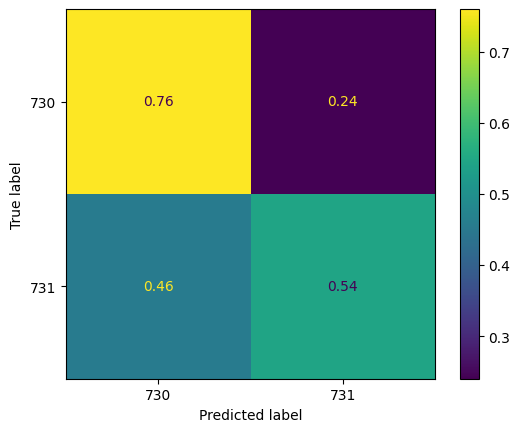

Accuracy: 0.6759530791788856
Accuracy 730: 0.7649397197784294
Accuracy 731: 0.5869664385793418
Integrated:  122760  percentual:  1.0 %


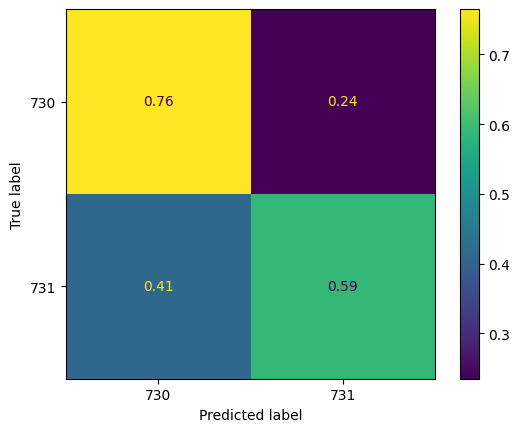

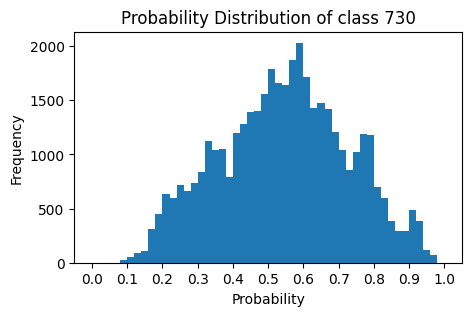

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier29.yaml
Train set: (81839, 30) (81839,)
Test set: (40921, 30) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.6288774845226458
Accuracy train: 0.7051161426703649
Accuracy test:  0.6330246083917793
Accuracy all:   0.6810850439882697
Accuracy: 0.7051161426703649
Accuracy 730: 0.7973851417399804
Accuracy 731: 0.6128448886825191
Integrated:  81839  percentual:  1.0 %


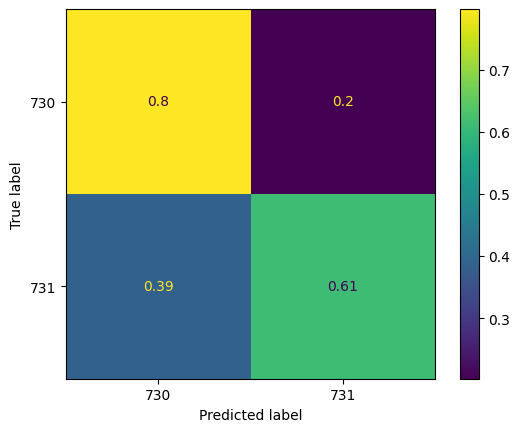

Accuracy: 0.6330246083917793
Accuracy 730: 0.7472140762463343
Accuracy 731: 0.5188407213723669
Integrated:  40921  percentual:  1.0 %


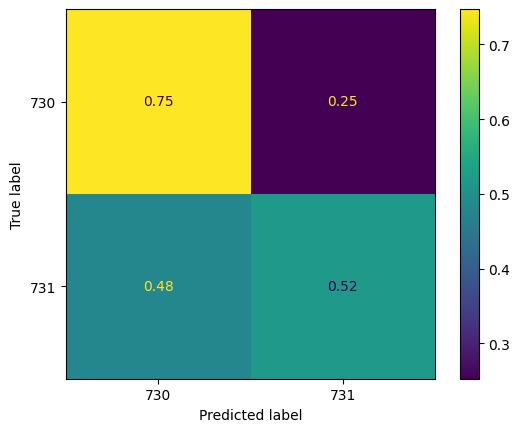

Accuracy: 0.6810850439882697
Accuracy 730: 0.7806614532420985
Accuracy 731: 0.5815086347344411
Integrated:  122760  percentual:  1.0 %


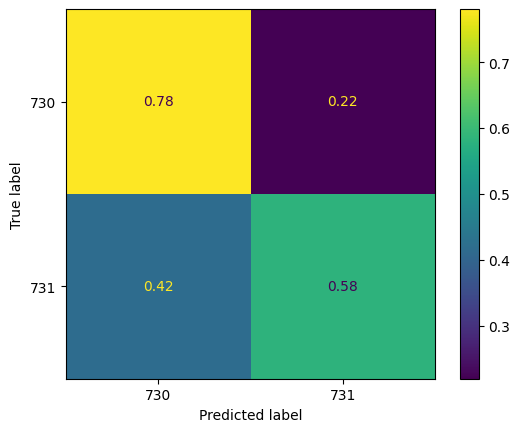

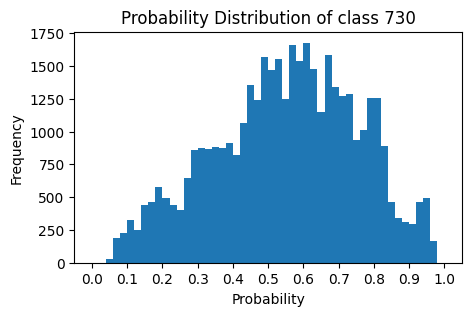

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier30.yaml
Train set: (81839, 31) (81839,)
Test set: (40921, 31) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.627215705441512
Accuracy train: 0.7077310328816334
Accuracy test:  0.6316561178856822
Accuracy all:   0.6823721081785598
Accuracy: 0.7077310328816334
Accuracy 730: 0.7995356793743891
Accuracy 731: 0.6159241428187394
Integrated:  81839  percentual:  1.0 %


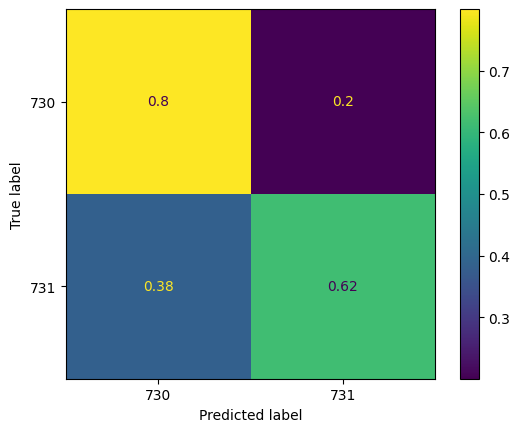

Accuracy: 0.6316561178856822
Accuracy 730: 0.7462854349951125
Accuracy 731: 0.5170324031083525
Integrated:  40921  percentual:  1.0 %


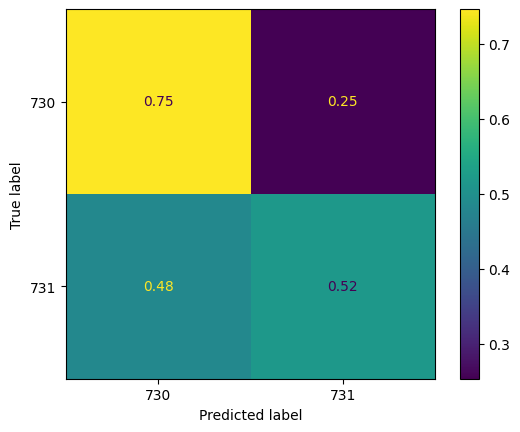

Accuracy: 0.6823721081785598
Accuracy 730: 0.7817855979146302
Accuracy 731: 0.5829586184424894
Integrated:  122760  percentual:  1.0 %


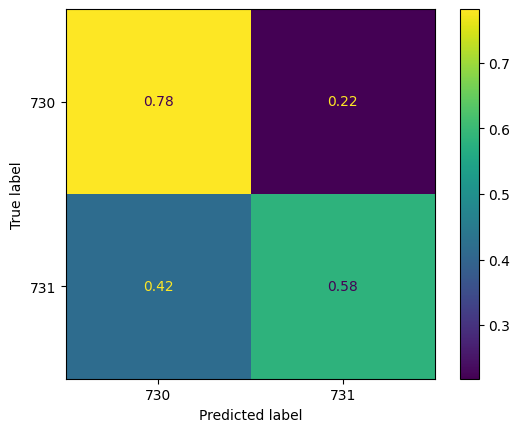

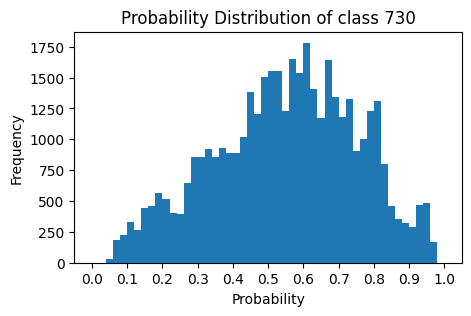

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier31.yaml
Train set: (81839, 32) (81839,)
Test set: (40921, 32) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.612862495927012
Accuracy train: 0.7020980217255831
Accuracy test:  0.6190464553652159
Accuracy all:   0.6744134897360704
Accuracy: 0.7020980217255831
Accuracy 730: 0.770405669599218
Accuracy 731: 0.6337887045137955
Integrated:  81839  percentual:  1.0 %


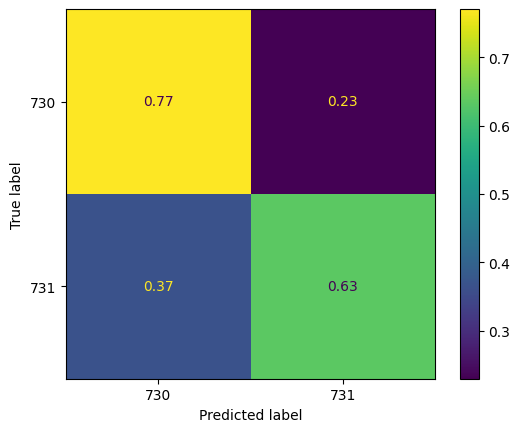

Accuracy: 0.6190464553652159
Accuracy 730: 0.7130009775171066
Accuracy 731: 0.525096525096525
Integrated:  40921  percentual:  1.0 %


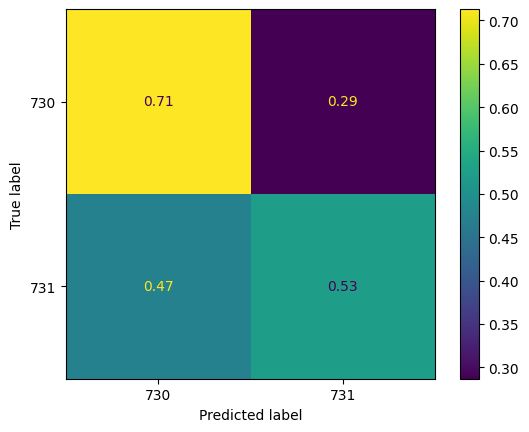

Accuracy: 0.6744134897360704
Accuracy 730: 0.7512707722385141
Accuracy 731: 0.5975562072336266
Integrated:  122760  percentual:  1.0 %


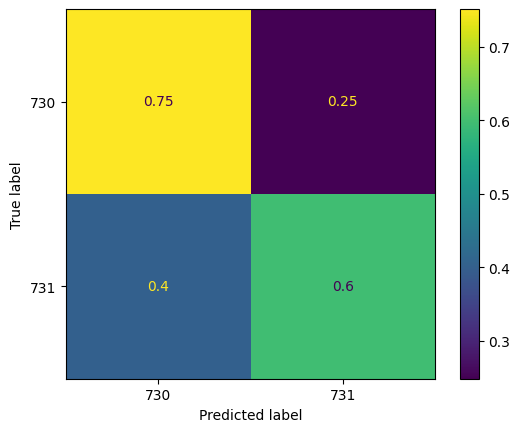

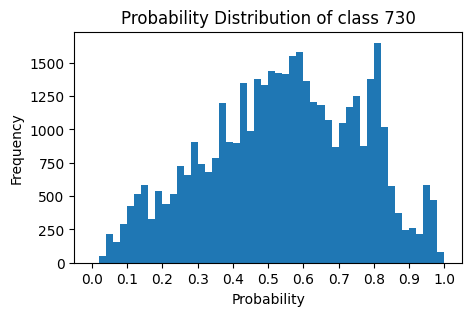

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier32.yaml
Train set: (81839, 33) (81839,)
Test set: (40921, 33) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.6130172694688825
Accuracy train: 0.6661371717640734
Accuracy test:  0.6350529068204589
Accuracy all:   0.6557754969045292
Accuracy: 0.6661371717640734
Accuracy 730: 0.6806451612903226
Accuracy 731: 0.651628827683961
Integrated:  81839  percentual:  1.0 %


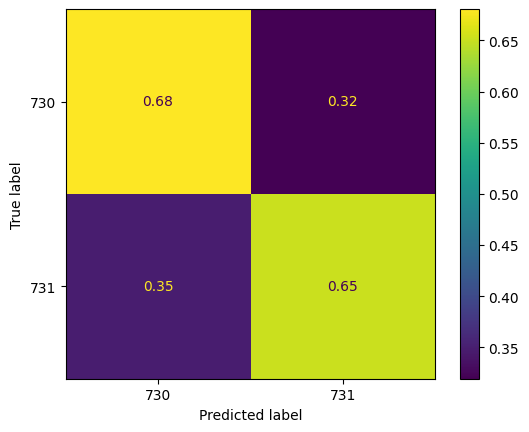

Accuracy: 0.6350529068204589
Accuracy 730: 0.6925708699902249
Accuracy 731: 0.5775377547529447
Integrated:  40921  percentual:  1.0 %


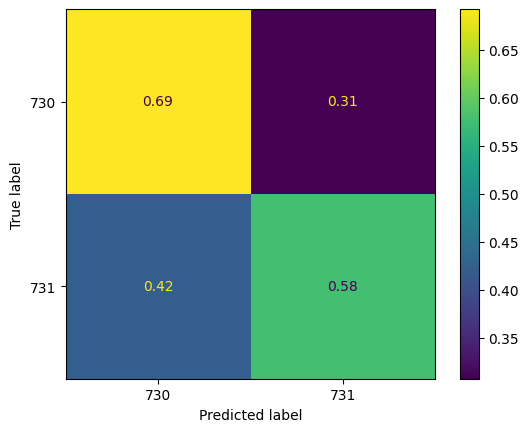

Accuracy: 0.6557754969045292
Accuracy 730: 0.6846203975236234
Accuracy 731: 0.626930596285435
Integrated:  122760  percentual:  1.0 %


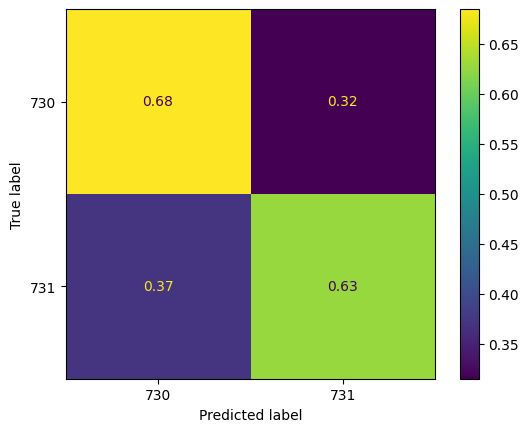

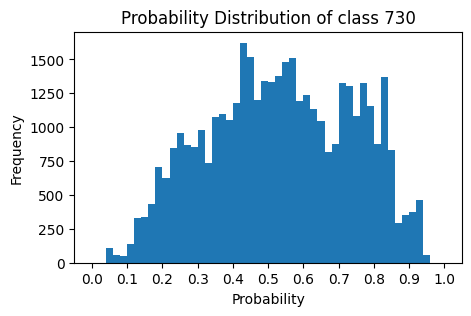

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier33.yaml
Train set: (81839, 34) (81839,)
Test set: (40921, 34) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.610475724991854
Accuracy train: 0.670804872982319
Accuracy test:  0.6260599692089636
Accuracy all:   0.6558895405669599
Accuracy: 0.670804872982319
Accuracy 730: 0.684652981427175
Accuracy 731: 0.65695642611012
Integrated:  81839  percentual:  1.0 %


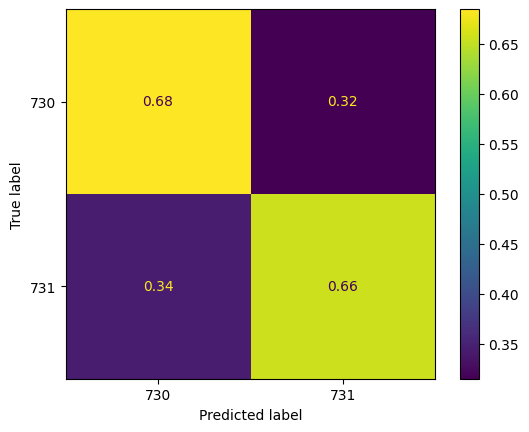

Accuracy: 0.6260599692089636
Accuracy 730: 0.6725806451612903
Accuracy 731: 0.579541566883339
Integrated:  40921  percentual:  1.0 %


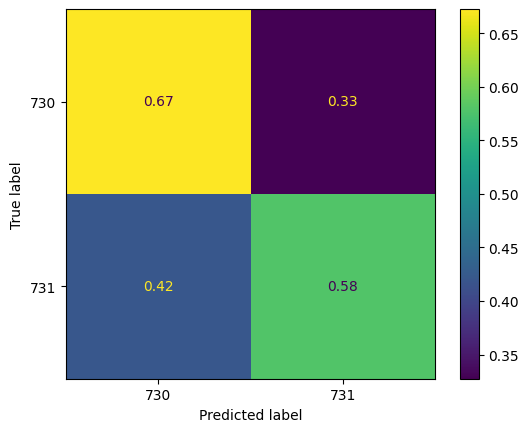

Accuracy: 0.6558895405669599
Accuracy 730: 0.6806288693385467
Accuracy 731: 0.6311502117953731
Integrated:  122760  percentual:  1.0 %


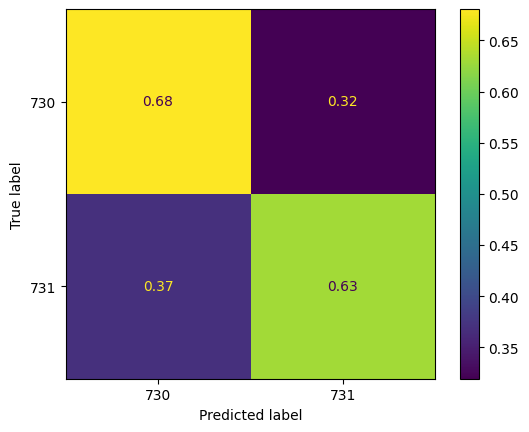

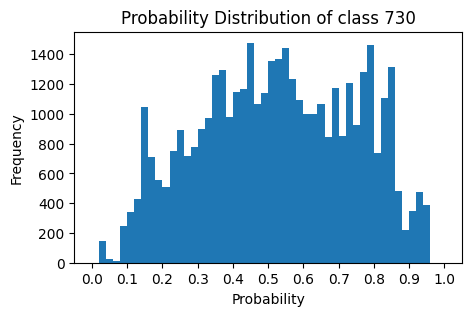

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier34.yaml
Train set: (81839, 35) (81839,)
Test set: (40921, 35) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.6099869664385793
Accuracy train: 0.6721000989748164
Accuracy test:  0.6255223479387112
Accuracy all:   0.6565738025415445
Accuracy: 0.6721000989748164
Accuracy 730: 0.6860703812316715
Accuracy 731: 0.6581294753048706
Integrated:  81839  percentual:  1.0 %


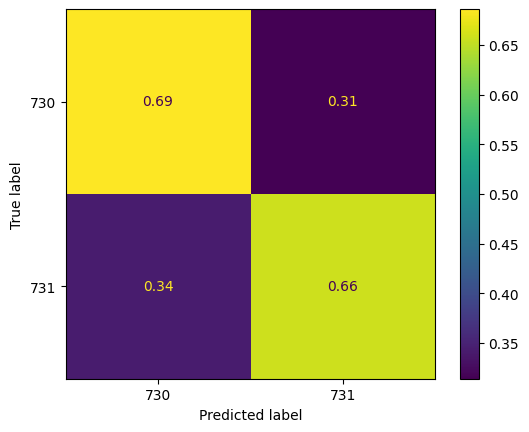

Accuracy: 0.6255223479387112
Accuracy 730: 0.6718963831867057
Accuracy 731: 0.5791505791505791
Integrated:  40921  percentual:  1.0 %


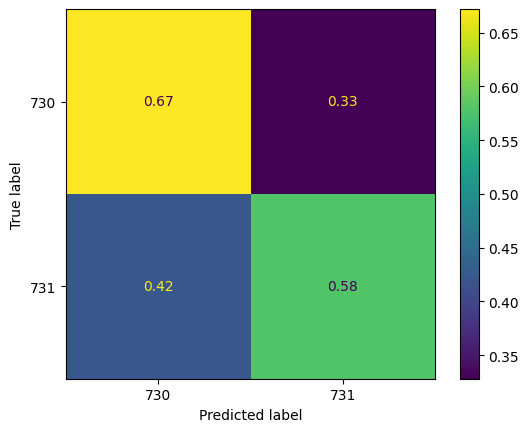

Accuracy: 0.6565738025415445
Accuracy 730: 0.681345715216683
Accuracy 731: 0.631801889866406
Integrated:  122760  percentual:  1.0 %


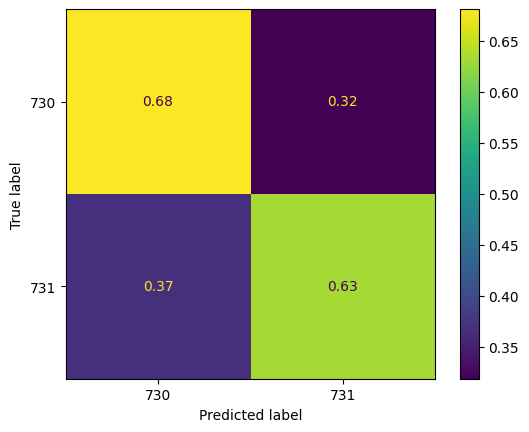

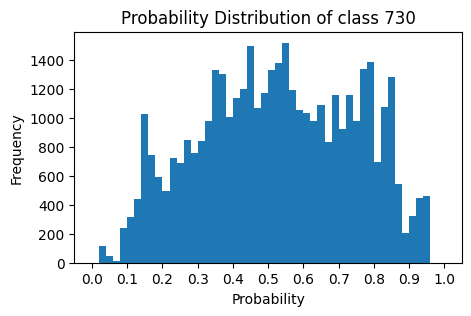

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier35.yaml
Train set: (81839, 36) (81839,)
Test set: (40921, 36) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.6079586184424894
Accuracy train: 0.6709392832268234
Accuracy test:  0.6214901884118179
Accuracy all:   0.6544558488106875
Accuracy: 0.6709392832268234
Accuracy 730: 0.6832844574780058
Accuracy 731: 0.6585938072777927
Integrated:  81839  percentual:  1.0 %


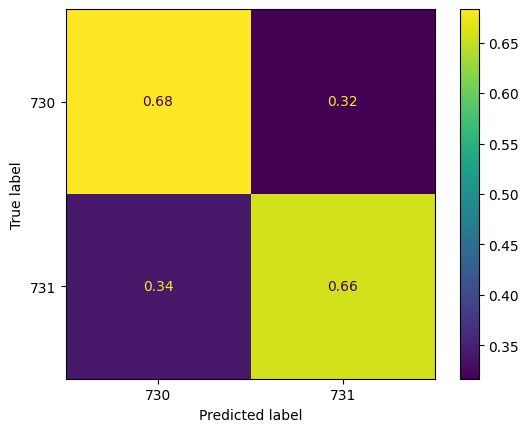

Accuracy: 0.6214901884118179
Accuracy 730: 0.6621212121212121
Accuracy 731: 0.5808611504814036
Integrated:  40921  percentual:  1.0 %


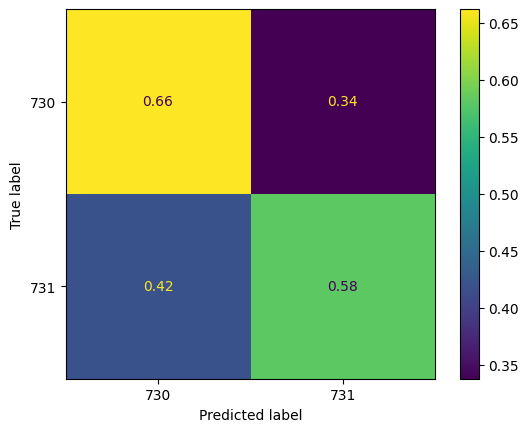

Accuracy: 0.6544558488106875
Accuracy 730: 0.6762300423590746
Accuracy 731: 0.6326816552623005
Integrated:  122760  percentual:  1.0 %


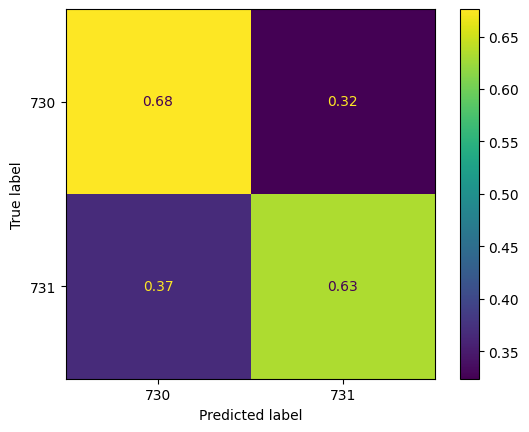

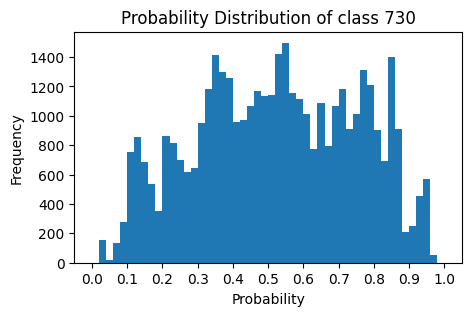

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier36.yaml
Train set: (81839, 37) (81839,)
Test set: (40921, 37) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.6074372759856631
Accuracy train: 0.6700717261941128
Accuracy test:  0.6204882578627111
Accuracy all:   0.6535434995112415
Accuracy: 0.6700717261941128
Accuracy 730: 0.6782258064516129
Accuracy 731: 0.6619174466629194
Integrated:  81839  percentual:  1.0 %


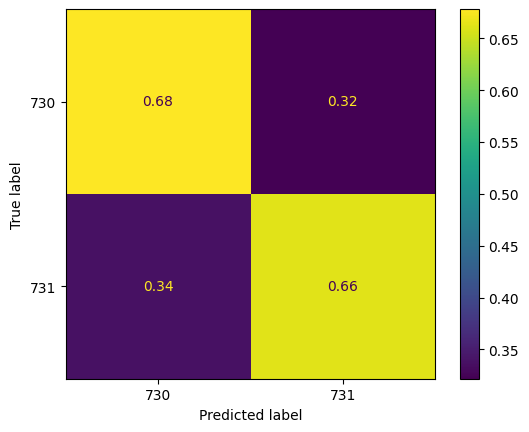

Accuracy: 0.6204882578627111
Accuracy 730: 0.6626588465298143
Accuracy 731: 0.5783197302184644
Integrated:  40921  percentual:  1.0 %


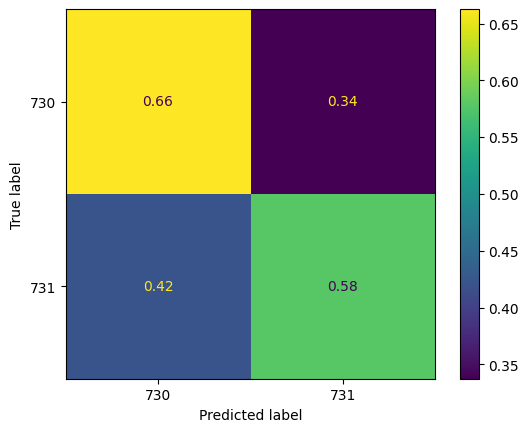

Accuracy: 0.6535434995112415
Accuracy 730: 0.6730368198110134
Accuracy 731: 0.6340501792114696
Integrated:  122760  percentual:  1.0 %


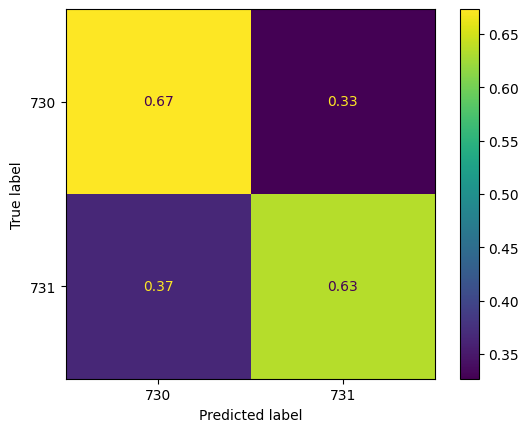

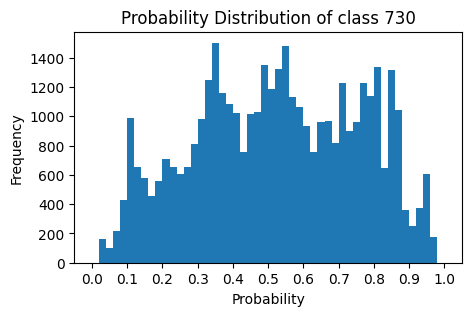

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier37.yaml
Train set: (81839, 38) (81839,)
Test set: (40921, 38) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.6113147605083089
Accuracy train: 0.7296887791884065
Accuracy test:  0.6001563989149825
Accuracy all:   0.6865102639296188
Accuracy: 0.7296887791884065
Accuracy 730: 0.7859481915933528
Accuracy 731: 0.6734279918864098
Integrated:  81839  percentual:  1.0 %


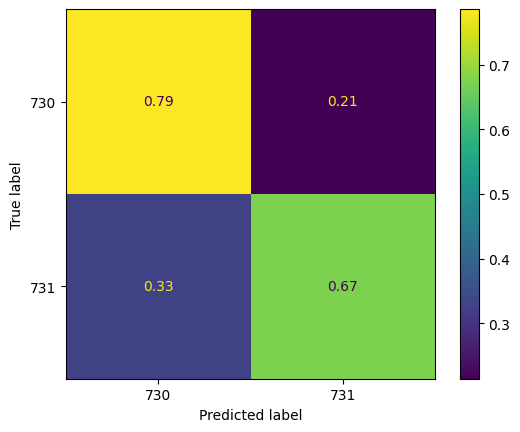

Accuracy: 0.6001563989149825
Accuracy 730: 0.6800097751710655
Accuracy 731: 0.5203069253702165
Integrated:  40921  percentual:  1.0 %


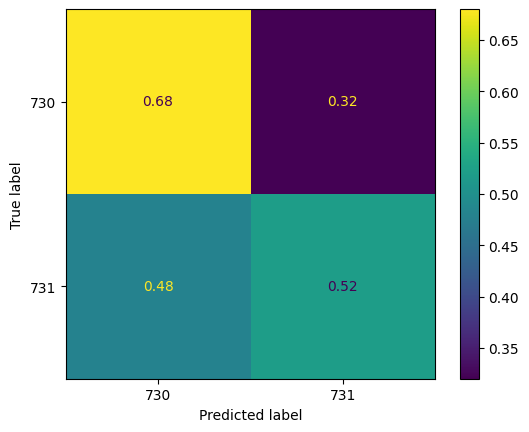

Accuracy: 0.6865102639296188
Accuracy 730: 0.7506353861192571
Accuracy 731: 0.6223851417399805
Integrated:  122760  percentual:  1.0 %


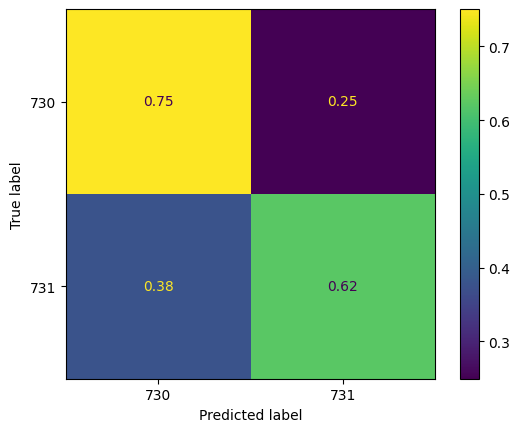

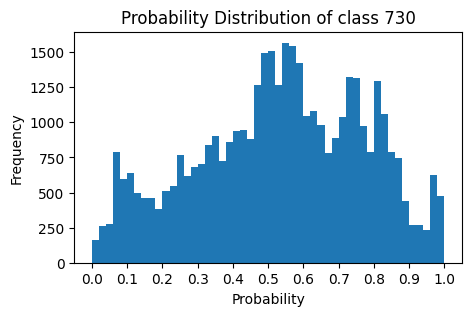

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier38.yaml
Train set: (81839, 39) (81839,)
Test set: (40921, 39) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.6090257412838057
Accuracy train: 0.7323647649653588
Accuracy test:  0.6017203880648078
Accuracy all:   0.6888155751058976
Accuracy: 0.7323647649653588
Accuracy 730: 0.7805718475073313
Accuracy 731: 0.6841565043133997
Integrated:  81839  percentual:  1.0 %


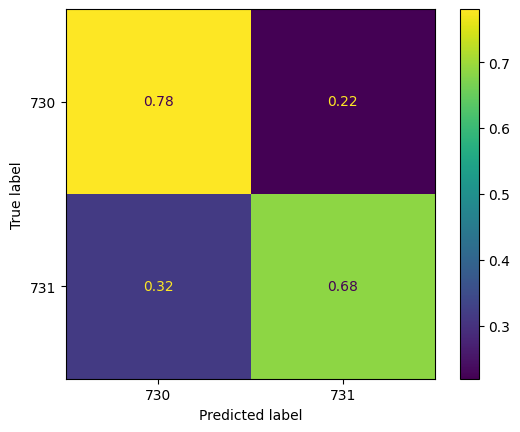

Accuracy: 0.6017203880648078
Accuracy 730: 0.6767839687194526
Accuracy 731: 0.5266604760275646
Integrated:  40921  percentual:  1.0 %


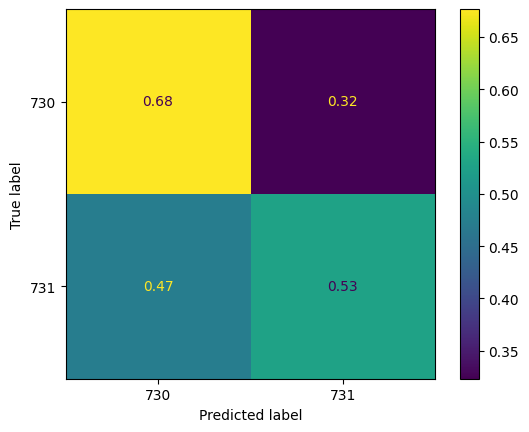

Accuracy: 0.6888155751058976
Accuracy 730: 0.7459758879113718
Accuracy 731: 0.6316552623004236
Integrated:  122760  percentual:  1.0 %


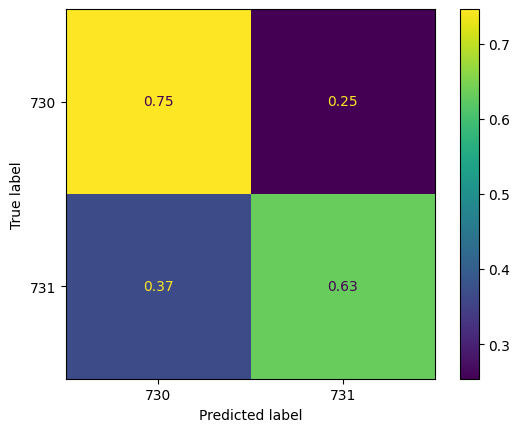

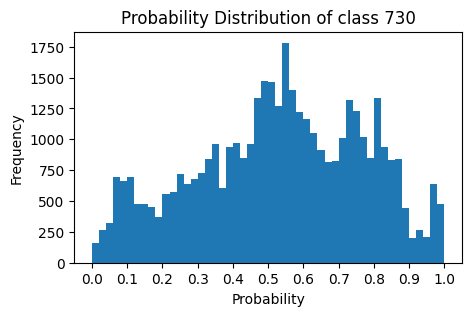

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier39.yaml
Train set: (81839, 40) (81839,)
Test set: (40921, 40) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.6147686542847833
Accuracy train: 0.746661127335378
Accuracy test:  0.6129615600791769
Accuracy all:   0.7020935158031932
Accuracy: 0.746661127335378
Accuracy 730: 0.7990224828934507
Accuracy 731: 0.6942984921430142
Integrated:  81839  percentual:  1.0 %


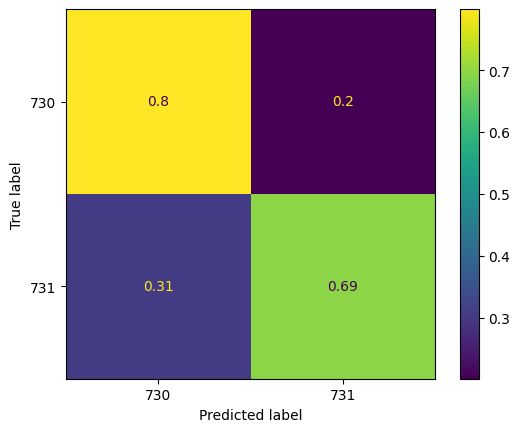

Accuracy: 0.6129615600791769
Accuracy 730: 0.7086021505376344
Accuracy 731: 0.5173256439079224
Integrated:  40921  percentual:  1.0 %


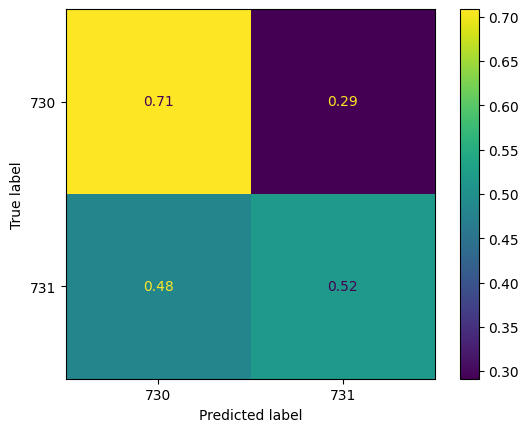

Accuracy: 0.7020935158031932
Accuracy 730: 0.7688823721081786
Accuracy 731: 0.6353046594982079
Integrated:  122760  percentual:  1.0 %


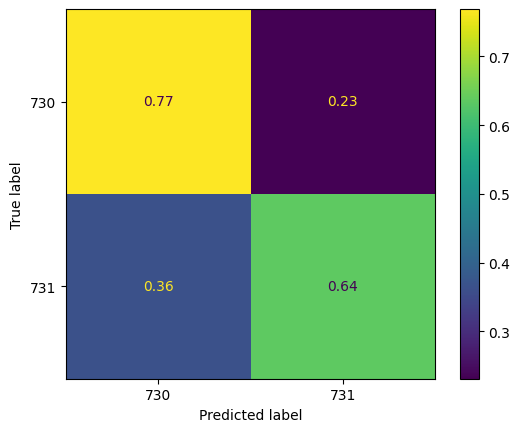

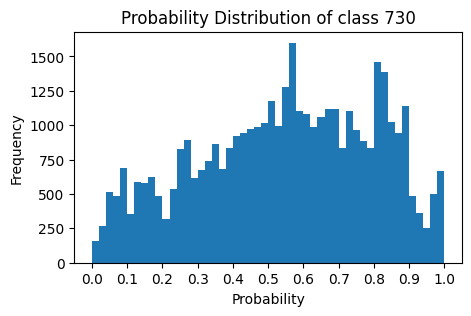

/home/paolo/cvsa_ws/record/c7/20250217/calibration/test/classifier/classifier40.yaml


In [33]:
subject = 'c7'
day = '20250217'
max_dataset = 40
for idx_dataset in range(1, max_dataset+1):
    path = '/home/paolo/cvsa_ws/record/' + subject + '/' + day + '/calibration/test/dataset/dataset' + str(idx_dataset) +'.mat'
    data = loadmat(path)

    X = fix_mat(data['X'])
    y = fix_mat(data['y']).ravel()
    info = fix_mat(data['info'])

    if 'logband' in path:
        type_ = 'logbandpower'
    else:
        type_ = 'psd'
        

    # start using last n-1 trials as test set
    n = 20
    start_test = info['startTrial'][-n] - 1

    X_train = X[:start_test,:]
    y_train = y[:start_test].ravel()
    X_test = X[start_test:,:]
    y_test = y[start_test:].ravel()

    print('Train set:', X_train.shape, y_train.shape)
    print('Test set:', X_test.shape, y_test.shape)
    
    param_grid = {'reg_param': [0.0, 0.1, 0.5, 1.0], 'priors': [None, [0.5, 0.5]]}

    #grid_search = GridSearchCV(estimator=QuadraticDiscriminantAnalysis(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=3).fit(X_train, y_train)
    grid_search = GridSearchCV(estimator=QuadraticDiscriminantAnalysis(), param_grid=param_grid, cv=5, n_jobs=-1).fit(X, y)

    #print("Results: ", grid_search.cv_results_)
    print("Best parameters found: ", grid_search.best_params_)
    print("Best score found: ", grid_search.best_score_)

    model_qda = QuadraticDiscriminantAnalysis(reg_param=grid_search.best_params_['reg_param'], store_covariance=True, priors=grid_search.best_params_['priors'])
    model_qda.fit(X_train, y_train)

    print(f'Accuracy train: {model_qda.score(X_train, y_train)}')
    print(f'Accuracy test:  {model_qda.score(X_test, y_test)}')
    print(f'Accuracy all:   {model_qda.score(X, y)}')


    ths_rej = [0.5, 0.5]
    bins_step = 0.02

    print_cm_rej(model_qda, X_train, y_train, ths_rej, 'train set',  ['730', '731'])
    print_cm_rej(model_qda, X_test,  y_test,  ths_rej, 'test set',  ['730', '731'])
    print_cm_rej(model_qda, X,  y,  ths_rej, 'all dataset',  ['730', '731'])

    histo_prediction(X_test, model_qda, bins_step, classes=['730', '731'])
    
    features_label = []
    if type(info['chSelected'].tolist()) == int:
        features_label.append(str(info['channelsLabel'][info['chSelected'].tolist() - 1][0]))
    else:
        for i in range(0, len(info['chSelected'].tolist())):
            features_label.append(str(info['channelsLabel'][info['chSelected'][i] - 1][0]))

    files = []
    for i in range(0, len(info['files'])):
        str_file = info['files'][i][0]
        files.append(str(str_file))
        
    band = info['bandSelected'].tolist()
    id_ch = info['chSelected'].tolist()

    model_params = {
        'QdaCfg': {
            'name': "qda",
            'params': {
                'subject': subject,
                'filename': 'qda',
                'filename_dataset': path,
                'files': files,
                'type_data': type_,
                'nclasses': int(len(model_qda.classes_)),
                'classlbs': model_qda.classes_.tolist(),
                'nfeatures': int(model_qda.n_features_in_),
                'chans': features_label,
                'idchans': id_ch, 
                'note': 'idchans are saved in matlab convention, instead the names are correct',
                'sampleRate': int(info['sampleRate']),
                'band': band,
                'filterOrder': int(info['filterOrder']),
                'priors': model_qda.priors_.tolist(),
                'means': model_qda.means_.tolist(),
                'covs': [arr.tolist() for arr in model_qda.covariance_],
                'rotations': [arr.tolist() for arr in model_qda.rotations_],
                'scalings': [arr.tolist() for arr in model_qda.scalings_]
            }
        }
    }

    # Save parameters to a YAML file
    c_dir = os.getcwd()
    c_prev = os.path.abspath(os.path.join(c_dir, os.pardir))
    path2save = c_prev[0:20] + 'record/' + subject + '/' + day + '/calibration/test/classifier/classifier' + str(idx_dataset) + '.yaml'

    yaml = YAML()
    with open(path2save, 'w') as file:
        yaml.dump(model_params, file)
        
    print(path2save)
